## **PINNs Prediction model**

In [ ]:
import torch
import torch.nn as nn
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # volume equation
# def eqn1(Qi,Qos,Qor,V,Xv,Xd,Glc,Lac,mAb):
#     return Xv*(((0.22252*Glc*(1-0.000688*mAb)/((Glc+0.85*Xv)*(344+Lac)))-(7.255/1000000)-((Qi-Qor)/V)))
# def eqn2(Qi,Qos,Qor,V,Xv,Xd,Glc,Lac,mAb):
#     return ((0.7255/100000)*Xv- (Qi-Qor)*Xd/V)
# def eqn3(Qi,Qos,Qor,V,Xv,Xd,Glc,Lac,mAb):
#     return ((Qi*(12.96-Glc)/V)-Xv*((1.102/10000)+((0.108497365*Glc*(1-0.000688*mAb))/((Glc+0.85*Xv)*(344+Lac)))))
# def eqn4(Qi,Qos,Qor,V,Xv,Xd,Glc,Lac,mAb):
#     return ((-Qi*Lac/V)+Xv*(((628-Lac)*(((0.00017896*Glc*(1-0.000688*mAb))/((Glc+0.85*Xv)*(344+Lac)))+((0.00016319/10000)+(((1.606723/100000)*Glc*(1-0.000688*mAb))/((Glc+0.85*Xv)*(344+Lac))))))+((1.89/100000)*(1-2*Lac))))
# def eqn5(Qi,Qos,Qor,V,Xv,Xd,Glc,Lac,mAb):
#     return ((-(Qi-Qor)*mAb/V)+Xv*((0.012)+(((1.473136/100000)*Glc*(1-0.000688*mAb))/((Glc+0.85*Xv)*(344+Lac)))))

In [ ]:
# volume equation
def eqn1(Qi,Qos,Qor,V,Xv,Xd,Glc,Lac,mAb):
    return Xv*(((0.22252*Glc*(1-0.000688*mAb*1000)/((Glc+0.85*Xv)*(344+Lac)))-(7.255/1000000)-((Qi-Qor)/V)))
def eqn2(Qi,Qos,Qor,V,Xv,Xd,Glc,Lac,mAb):
    return ((0.7255/100000)*Xv- (Qi-Qor)*Xd/V)
def eqn3(Qi,Qos,Qor,V,Xv,Xd,Glc,Lac,mAb):
    return ((Qi*(12.96-Glc)/V)-Xv*((1.102/10000)+((0.108497365*Glc*(1-0.000688*mAb*1000))/((Glc+0.85*Xv)*(344+Lac)))))
def eqn4(Qi,Qos,Qor,V,Xv,Xd,Glc,Lac,mAb):
    return ((-Qi*Lac/V)+Xv*(((628-Lac)*(((0.00017896*Glc*(1-0.000688*mAb*1000))/((Glc+0.85*Xv)*(344+Lac)))+((0.00016319/10000)+(((1.606723/100000)*Glc*(1-0.000688*mAb*1000))/((Glc+0.85*Xv)*(344+Lac))))))+((1.89/100000)*(1-2*Lac))))
def eqn5(Qi,Qos,Qor,V,Xv,Xd,Glc,Lac,mAb):
    return ((-(Qi-Qor)*mAb*1000/V)+Xv*((0.012)+(((1.473136/100000)*Glc*(1-0.000688*mAb*1000))/((Glc+0.85*Xv)*(344+Lac)))))

Exception ignored in: <generator object iterparse.<locals>.iterator at 0x7c4dc6152b90>
Traceback (most recent call last):
  File "/usr/lib/python3.10/xml/etree/ElementTree.py", line 1253, in iterator
    yield from pullparser.read_events()
KeyboardInterrupt: 


KeyboardInterrupt: 

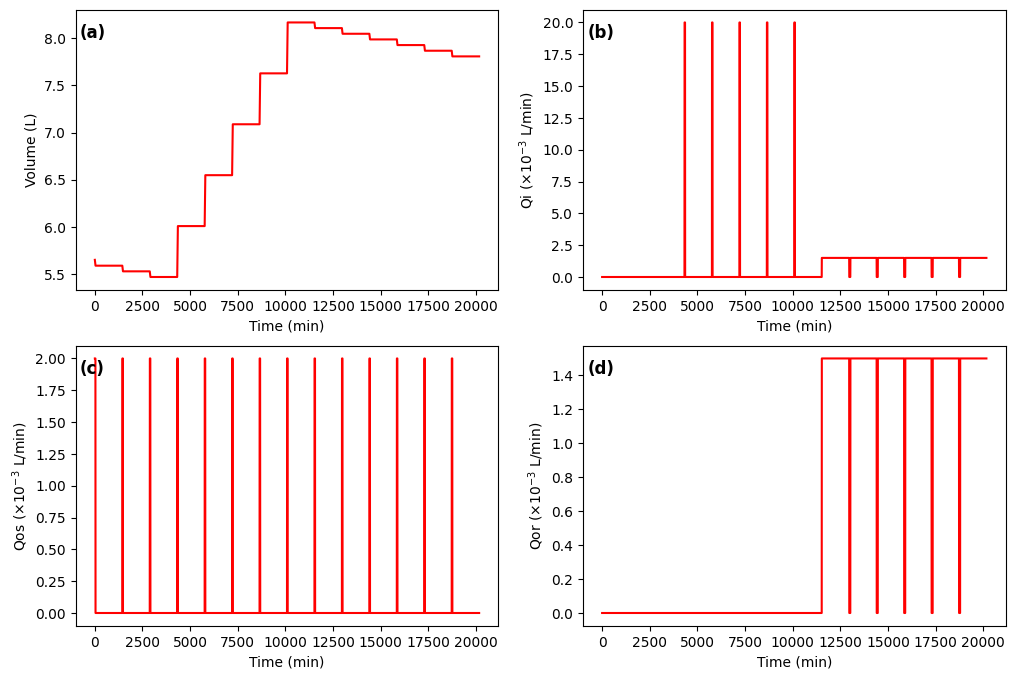

In [ ]:
input1 = np.array(torch.linspace(0,20160,20161))
import pandas as pd
file_path = "/content/drive/MyDrive/Spline/dataloss_diff_spline_14days.xlsx"
df = pd.read_excel(file_path)
df
Xv_inc=0.53       #14days
Xd_inc=0.005354
Glc_inc=5.366846
Lac_inc=0.240476
mAb_inc=0.00670
Xv_ic1=np.full((20161,),Xv_inc)
Xd_ic1=np.full((20161,),Xd_inc)
Glc_ic1=np.full((20161,),Glc_inc)
Lac_ic1=np.full((20161,),Lac_inc)
mAb_ic1=np.full((20161,),mAb_inc)
input2=np.array(df['Qi (ml/min)'])
input3=np.array(df['Qos (ml/min)'])
input4=np.array(df['Qor (ml/min)'])
input5=np.array(df['V (ml)'])
final_x = np.vstack((input1, input2, input3, input4, input5, Xv_ic1, Xd_ic1, Glc_ic1, Lac_ic1, mAb_ic1)).T
final_x
final_x = final_x.astype('float32')
import matplotlib.pyplot as plt

# Assuming you have data for input1, input2, input3, and input4
# Make sure these arrays have the same length

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # You can adjust the figsize as needed

# Plot each dataset in its corresponding subplot
axs[0, 0].plot(input1, input5/1000, color='red')
axs[0, 0].set_xlabel('Time (min)')  # Add X-axis label
axs[0, 0].set_ylabel('Volume (L)')  # Add Y-axis label
axs[0, 0].text(0.01, 0.95, '(a)', transform=axs[0, 0].transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='left', color='black', weight='bold')

axs[0, 1].plot(input1, input2, color='red')
axs[0, 1].set_xlabel('Time (min)')  # Add X-axis label
axs[0, 1].set_ylabel('Qi ($\\times 10^{-3}$ L/min)')  # Add Y-axis label
axs[0, 1].text(0.01, 0.95, '(b)', transform=axs[0, 1].transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='left', color='black', weight='bold')

axs[1, 0].plot(input1, input3, color='red')
axs[1, 0].set_xlabel('Time (min)')  # Add X-axis label
axs[1, 0].set_ylabel('Qos ($\\times 10^{-3}$ L/min)')  # Add Y-axis label
axs[1, 0].text(0.01, 0.95, '(c)', transform=axs[1, 0].transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='left', color='black', weight='bold')

axs[1, 1].plot(input1, input4, color='red')
axs[1, 1].set_xlabel('Time (min)')  # Add X-axis label
axs[1, 1].set_ylabel('Qor ($\\times 10^{-3}$ L/min)')  # Add Y-axis label
axs[1, 1].text(0.01, 0.95, '(d)', transform=axs[1, 1].transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='left', color='black', weight='bold')

plt.tight_layout()

# Save the combined subplot as a JPEG file
plt.savefig('input_14_Lred.jpg', dpi=800)  # Change 'input_data_15.jpg' to your desired file name
# files.download('input_13_red.jpg')
# Show the combined subplot
plt.show()


In [ ]:
input1 = np.array(torch.linspace(0,20160,20161))
import pandas as pd
file_path = "/content/drive/MyDrive/Spline/dataloss_diff_spline_14days.xlsx"
df = pd.read_excel(file_path)
df

Qi (ml/min)  Qos (ml/min)  Qor (ml/min)  V (ml)         Xv        Xd  \
0              0.0             2           0.0    5650   0.530000  0.005354   
1              0.0             2           0.0    5648   0.529932  0.005366   
2              0.0             2           0.0    5646   0.529864  0.005378   
3              0.0             2           0.0    5644   0.529796  0.005390   
4              0.0             2           0.0    5642   0.529728  0.005402   
...            ...           ...           ...     ...        ...       ...   
20156          1.5             0           1.5    7808  11.002163  1.890867   
20157          1.5             0           1.5    7808  11.001622  1.892065   
20158          1.5             0           1.5    7808  11.001081  1.893263   
20159          1.5             0           1.5    7808  11.000540  1.894462   
20160          1.5             0           1.5    7808  11.000000  1.895662   

            Glc       Lac          mAb  mAb(g/L)  
0      5.366846  0.240476     6.700000  0.006700  
1      5.365845  0.240362     6.713585  0.006714  
2      5.364846  0.240248     6.727157  0.006727  
3      5.363849  0.240135     6.740715  0.006741  
4      5.362854  0.240022     6.754261  0.006754  
...         ...       ...          ...       ...  
20156  0.473747  0.539209  2098.298159  2.098298  
20157  0.474093  0.539069  2098.323664  2.098324  
20158  0.474439  0.538930  2098.349140  2.098349  
20159  0.474785  0.538790  2098.374585  2.098375  
20160  0.475132  0.538650  2098.400000  2.098400  

[20161 rows x 10 columns]

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Assuming you have a dataframe called 'df' with the columns you want to normalize

# # Select the columns you want to normalize
# columns_to_normalize = ['Xv', 'Xd', 'Glc','Lac','mAb']

# # Create a StandardScaler object
# # scaler = StandardScaler()
# scaler = MinMaxScaler()

# # Fit the scaler to the selected columns
# scaler.fit(df[columns_to_normalize])

# # Transform the selected columns using the scaler
# df[columns_to_normalize] = scaler.transform(df[columns_to_normalize])
# df

In [ ]:
Xv_inc=0.53       #14days
Xd_inc=0.005354
Glc_inc=5.366846
Lac_inc=0.240476
mAb_inc=0.00670
Xv_ic1=np.full((20161,),Xv_inc)
Xd_ic1=np.full((20161,),Xd_inc)
Glc_ic1=np.full((20161,),Glc_inc)
Lac_ic1=np.full((20161,),Lac_inc)
mAb_ic1=np.full((20161,),mAb_inc)

In [ ]:
# Xv_inc=0.59         #15days
# Xd_inc=0.00596
# Glc_inc=5.364974
# Lac_inc=0.0063
# mAb_inc=0.000100
# Xv_ic1=np.full((21601,),Xv_inc)
# Xd_ic1=np.full((21601,),Xd_inc)
# Glc_ic1=np.full((21601,),Glc_inc)
# Lac_ic1=np.full((21601,),Lac_inc)
# mAb_ic1=np.full((21601,),mAb_inc)

In [ ]:
# Xv_inc=0.9        #13days sample not correct values
# Xd_inc=0.0596
# Glc_inc=5.64974
# Lac_inc=0.063
# mAb_inc=0.00100
# Xv_ic1=np.full((18721,),Xv_inc)
# Xd_ic1=np.full((18721,),Xd_inc)
# Glc_ic1=np.full((18721,),Glc_inc)
# Lac_ic1=np.full((18721,),Lac_inc)
# mAb_ic1=np.full((18721,),mAb_inc)

In [ ]:
input2=np.array(df['Qi (ml/min)'])
input3=np.array(df['Qos (ml/min)'])
input4=np.array(df['Qor (ml/min)'])
input5=np.array(df['V (ml)'])
final_x = np.vstack((input1, input2, input3, input4, input5, Xv_ic1, Xd_ic1, Glc_ic1, Lac_ic1, mAb_ic1)).T
final_x
final_x = final_x.astype('float32')


In [ ]:
from google.colab import files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

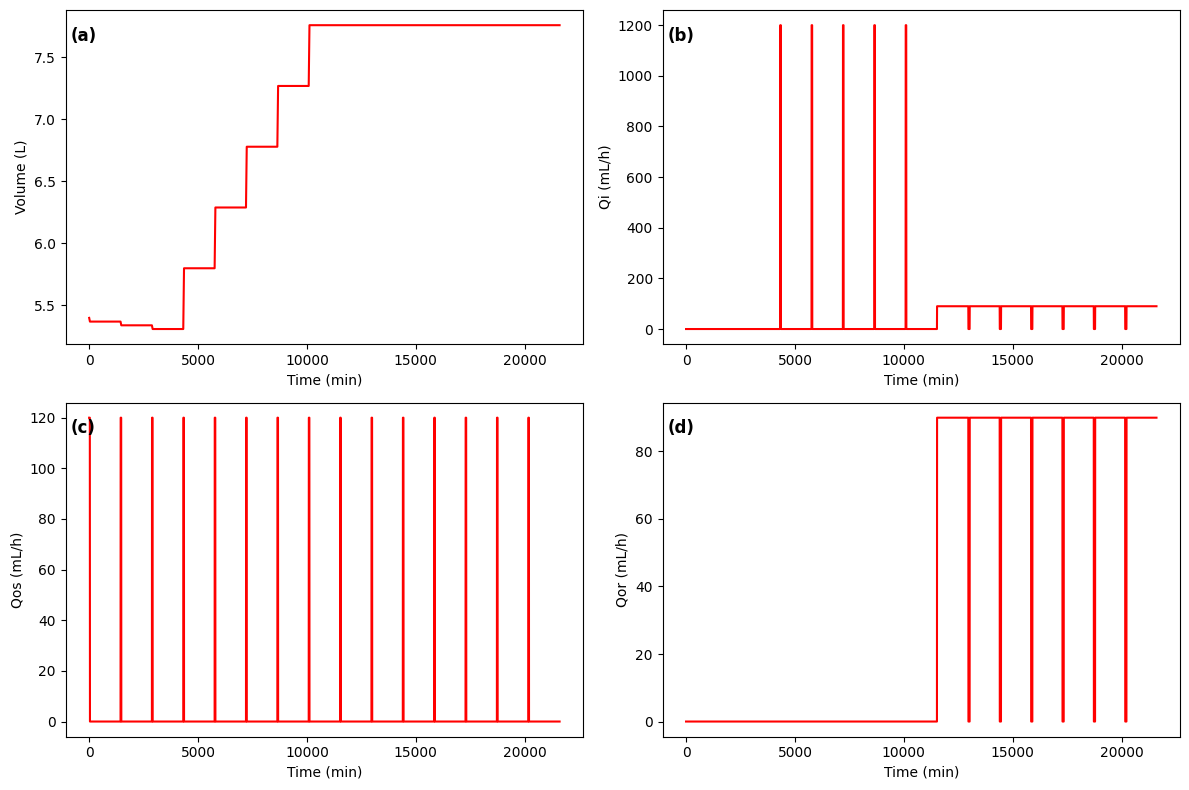

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have data for input1, input2, input3, and input4
# Make sure these arrays have the same length

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # You can adjust the figsize as needed

# Plot each dataset in its corresponding subplot
axs[0, 0].plot(input1, input5/1000, color='red')
axs[0, 0].set_xlabel('Time (min)')  # Add X-axis label
axs[0, 0].set_ylabel('Volume (L)')  # Add Y-axis label
axs[0, 0].text(0.01, 0.95, '(a)', transform=axs[0, 0].transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='left', color='black', weight='bold')

axs[0, 1].plot(input1, input2*60, color='red')
axs[0, 1].set_xlabel('Time (min)')  # Add X-axis label
axs[0, 1].set_ylabel('Qi (mL/h)')  # Add Y-axis label
axs[0, 1].text(0.01, 0.95, '(b)', transform=axs[0, 1].transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='left', color='black', weight='bold')

axs[1, 0].plot(input1, input3*60, color='red')
axs[1, 0].set_xlabel('Time (min)')  # Add X-axis label
axs[1, 0].set_ylabel('Qos (mL/h)')  # Add Y-axis label
axs[1, 0].text(0.01, 0.95, '(c)', transform=axs[1, 0].transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='left', color='black', weight='bold')

axs[1, 1].plot(input1, input4*60, color='red')
axs[1, 1].set_xlabel('Time (min)')  # Add X-axis label
axs[1, 1].set_ylabel('Qor (mL/h)')  # Add Y-axis label
axs[1, 1].text(0.01, 0.95, '(d)', transform=axs[1, 1].transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='left', color='black', weight='bold')

plt.tight_layout()

# Save the combined subplot as a JPEG file
plt.savefig('input_13_red.jpg', dpi=800)  # Change 'input_data_15.jpg' to your desired file name
files.download('input_13_red.jpg')
# Show the combined subplot
plt.show()


In [ ]:
def dat():
  input6=np.array(df['Xv'])
  input7=np.array(df['Xd'])
  input8=np.array(df['Glc'])
  input9=np.array(df['Lac'])
  input10=np.array(df['mAb(g/L)'])
  return input6,input7,input8,input9,input10

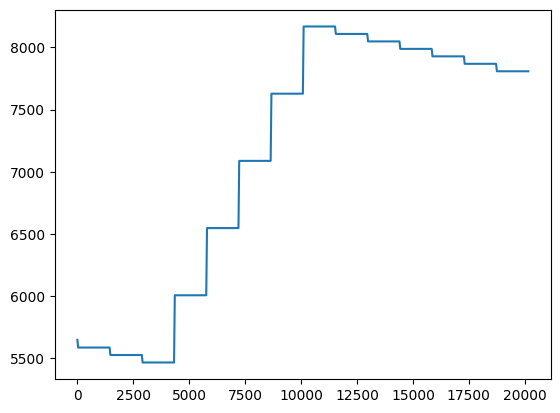

In [ ]:
import matplotlib.pyplot as plt
plt.plot(input1,input5)


Upload the first file:


Saving Picture1.jpg to Picture1.jpg
Upload the second file:


Saving Picture2.jpg to Picture2.jpg
Upload the third file:


Saving Picture3.jpg to Picture3.jpg


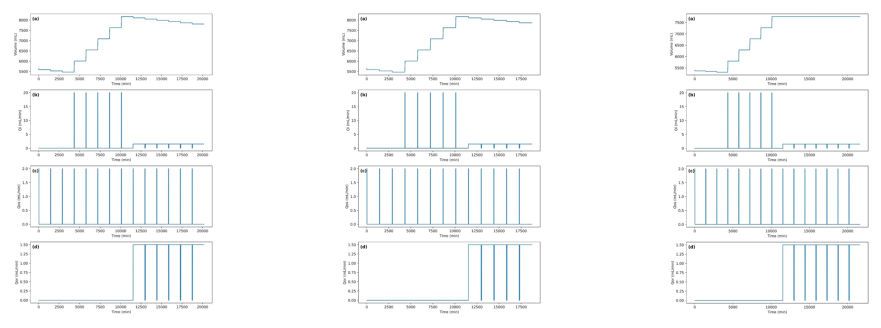

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
import io


# Upload images
uploaded_images = []

print("Upload the first file:")
uploaded = files.upload()
for uploaded_file in uploaded.values():
    img = Image.open(io.BytesIO(uploaded_file))
    uploaded_images.append(img)

print("Upload the second file:")
uploaded = files.upload()
for uploaded_file in uploaded.values():
    img = Image.open(io.BytesIO(uploaded_file))
    uploaded_images.append(img)

print("Upload the third file:")
uploaded = files.upload()
for uploaded_file in uploaded.values():
    img = Image.open(io.BytesIO(uploaded_file))
    uploaded_images.append(img)




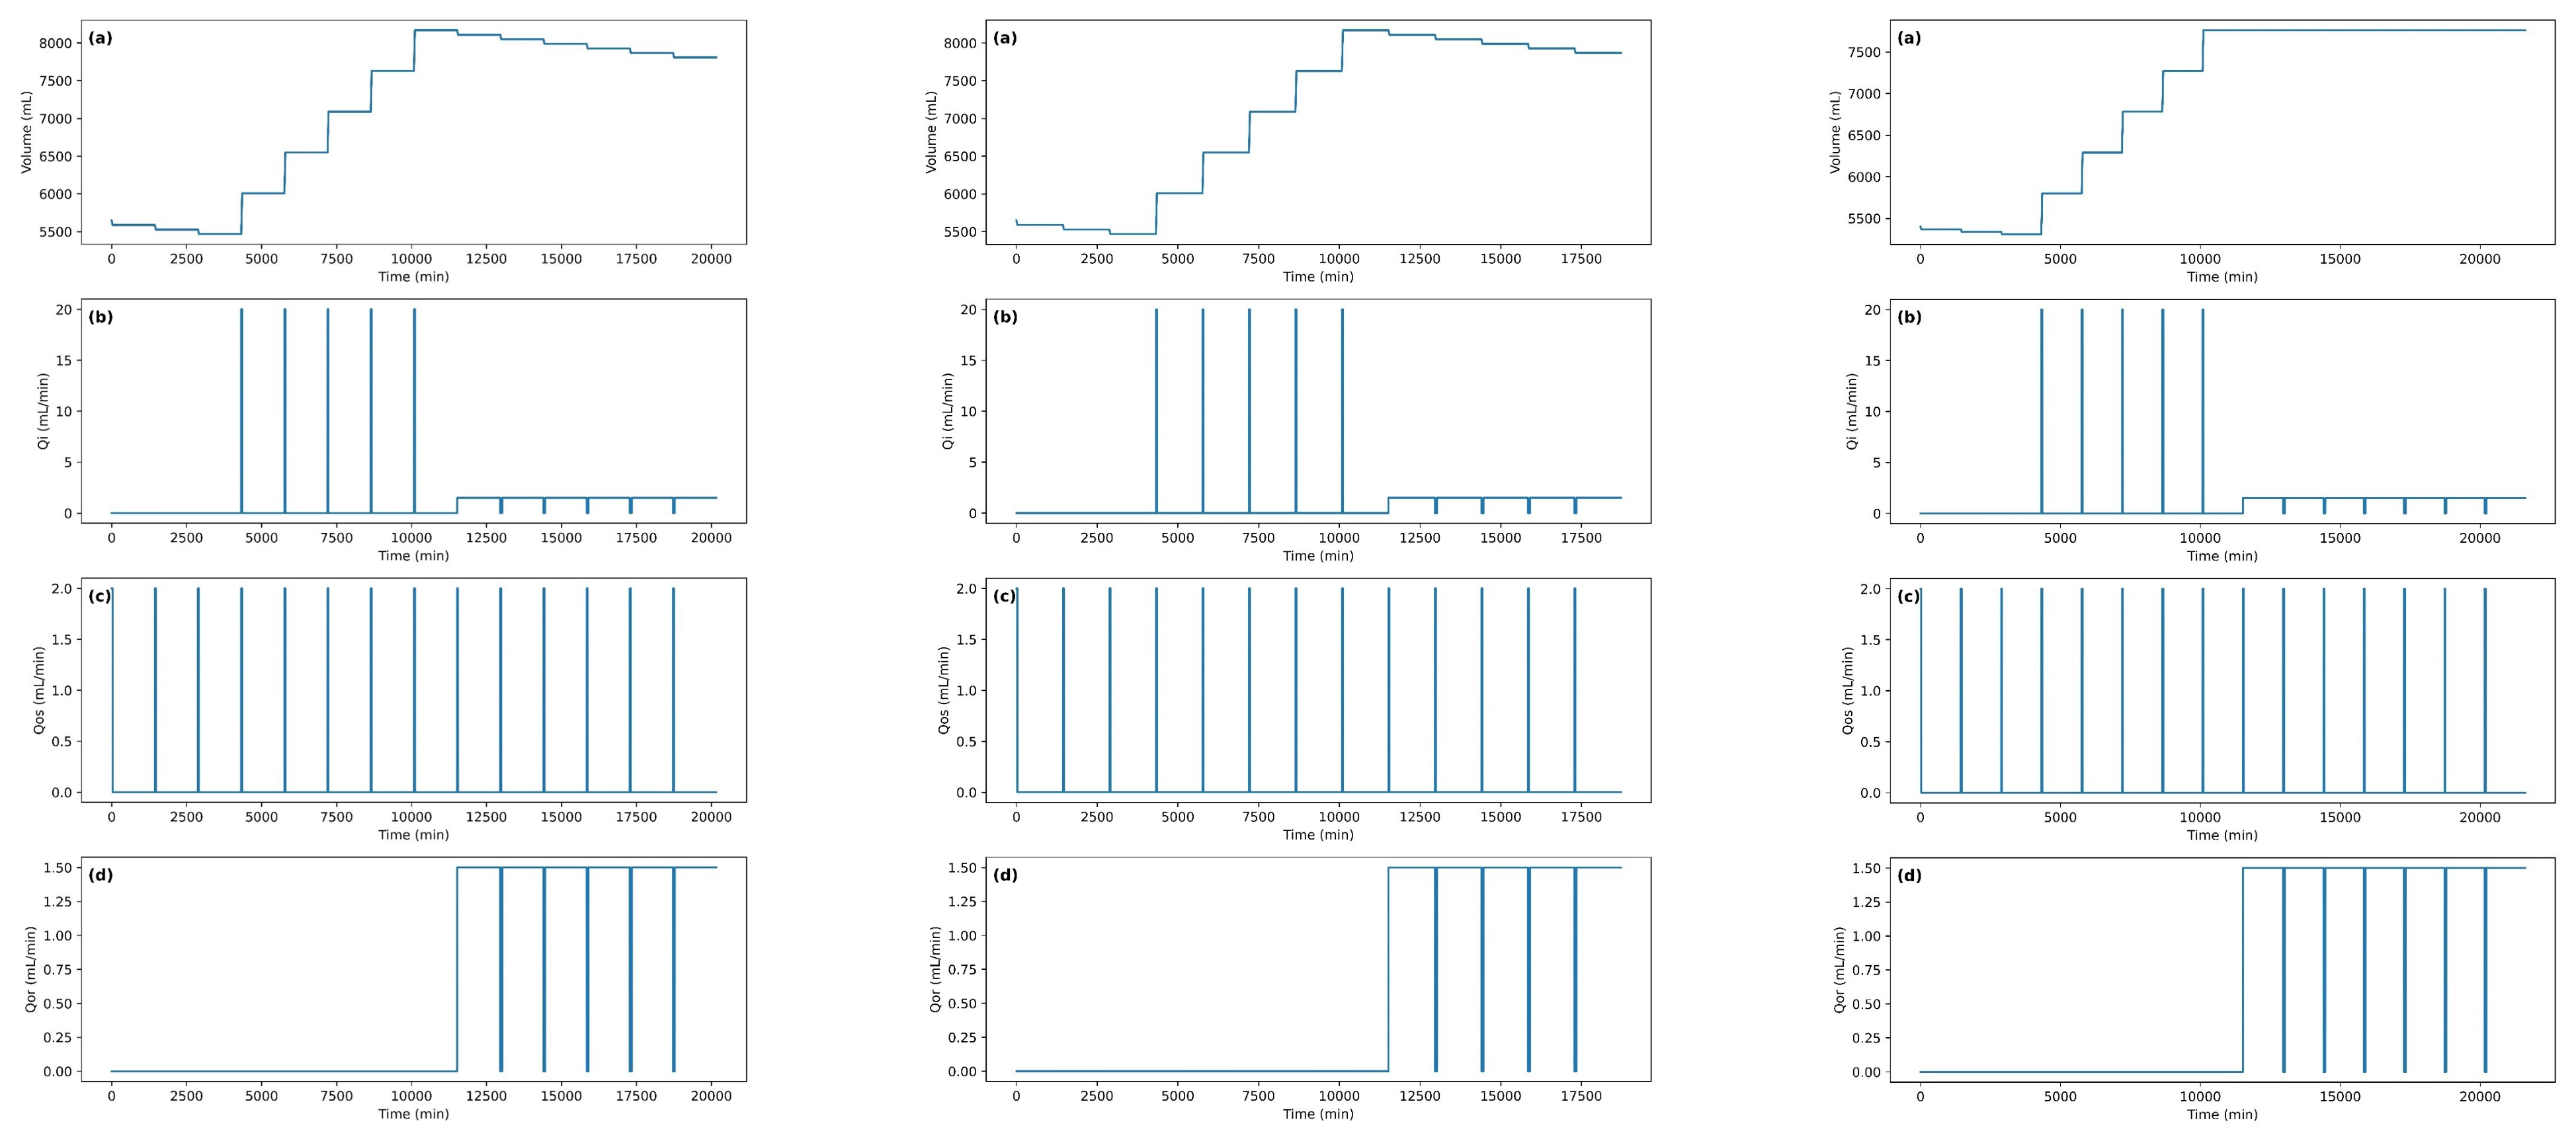

In [ ]:
def plot_images(image_list):
    plt.figure(figsize=(50, 40))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(image_list[i])
        plt.axis('off')
    plt.savefig("input_combined1.jpg", dpi=800)
    plt.show()
# Plot uploaded images
plot_images(uploaded_images)

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Function to plot the uploaded image with a labeled alphabet
def plot_image(ax, img_path, label):
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.text(0.01, 0.95, f'({label})', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left', color='black', weight='bold')

# Upload the files
uploaded_files = []

for i in range(1, 7):
    print(f"\nUpload the {['first', 'second', 'third', 'fourth', 'fifth', 'sixth'][i - 1]} file:")
    uploaded = files.upload()
    uploaded_files.append(list(uploaded.keys())[0])





Upload the first file:


Saving WW1.jpg to WW1 (1).jpg

Upload the second file:


Saving WW2.jpg to WW2 (1).jpg

Upload the third file:


Saving WW3.jpg to WW3 (1).jpg

Upload the fourth file:


Saving WW4.jpg to WW4 (1).jpg

Upload the fifth file:


Saving WW5.jpg to WW5 (1).jpg

Upload the sixth file:


Saving WW6.jpg to WW6 (1).jpg


In [ ]:
!pip install Pillow


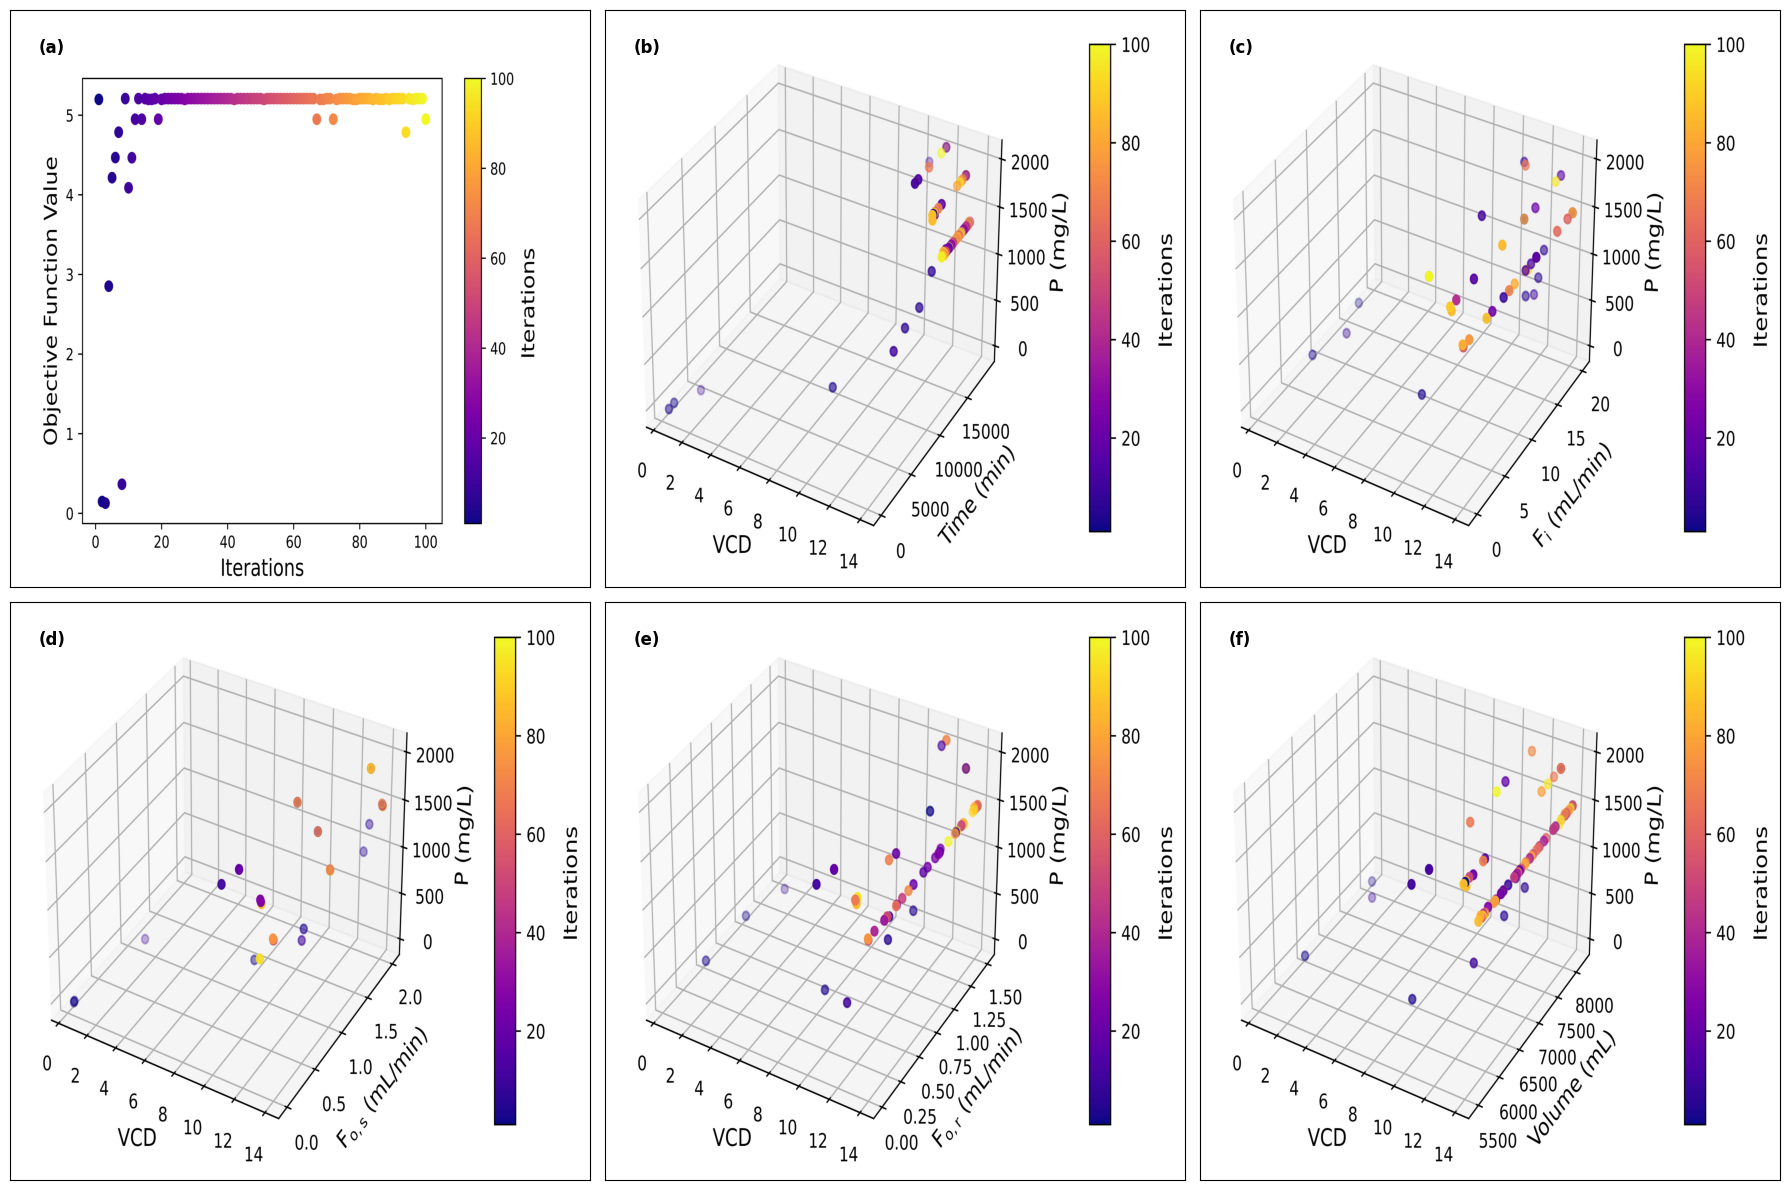

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from string import ascii_lowercase
from google.colab import files

# Function to combine images from uploaded files
def combine_images(uploaded_files):
    images = []
    for file_path in uploaded_files:
        img = Image.open(file_path)
        images.append(img)
    return images



# Combine images from the uploaded files
combined_images = combine_images(uploaded_files)

# Create a 2x3 subplot
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Iterate through the images and display them in the subplot
for i, ax in enumerate(axs.flat):
    # Load and display the combined image
    img = combined_images[i]
    ax.imshow(img, aspect='auto')

    # Remove tick labels
    ax.set_xticks([])
    ax.set_yticks([])

    # Add image numbering (a, b, c...)
    ax.text(0.05, 0.95, f'({ascii_lowercase[i]})', transform=ax.transAxes,
            fontsize=12, verticalalignment='top', horizontalalignment='left',
            color='black', weight='bold')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Save the subplot as a jpg image with dpi=600
plt.savefig('Weighted_3D.jpg', dpi=800)

# Display the saved image
plt.show()

# Optionally, download the saved image
files.download('Weighted_3D.jpg')

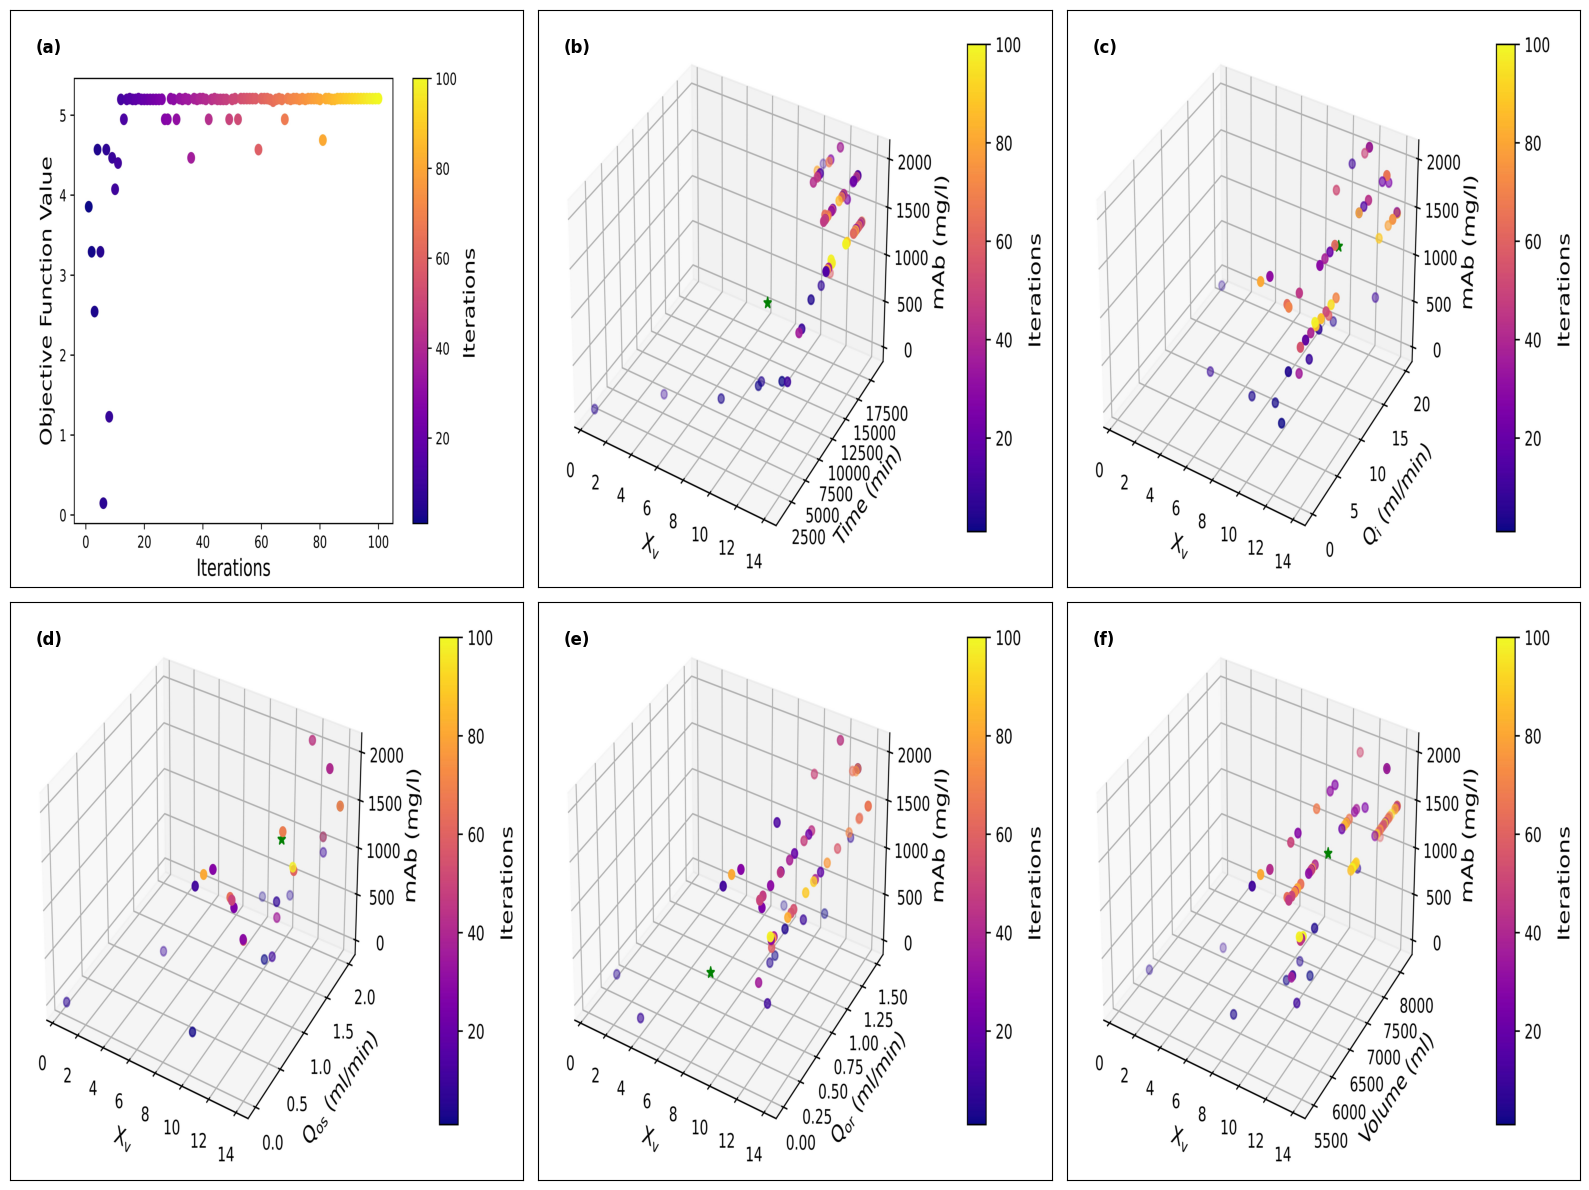

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from PIL import Image
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from string import ascii_lowercase
from google.colab import files

# Function to combine images from uploaded files
def combine_images(uploaded_files):
    images = []
    for file_name in uploaded_files:
        # Read the uploaded image
        img_data = uploaded_files[file_name]
        img = Image.open(io.BytesIO(img_data))
        images.append(img)
    return images

# Combine images from the uploaded files
combined_images = combine_images({**uploaded1, **uploaded2, **uploaded3, **uploaded4, **uploaded5, **uploaded6})

# Create a 2x3 subplot
fig, axs = plt.subplots(2, 3, figsize=(16, 12))

# Iterate through the images and display them in the subplot
for i, ax in enumerate(axs.flat):
    # Load and display the combined image
    img = combined_images[i]
    ax.imshow(img, aspect='auto')

    # Remove tick labels
    ax.set_xticks([])
    ax.set_yticks([])

    # Add image numbering (a, b, c...)
    ax.text(0.05, 0.95, f'({ascii_lowercase[i]})', transform=ax.transAxes,
            fontsize=12, verticalalignment='top', horizontalalignment='left',
            color='black', weight='bold')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Save the subplot as a jpg image with dpi=600
plt.savefig('combined_weighted.jpg', dpi=800)

# Display the saved image
plt.show()

# Optionally, download the saved image
files.download('combined_weighted.jpg')


In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from string import ascii_lowercase

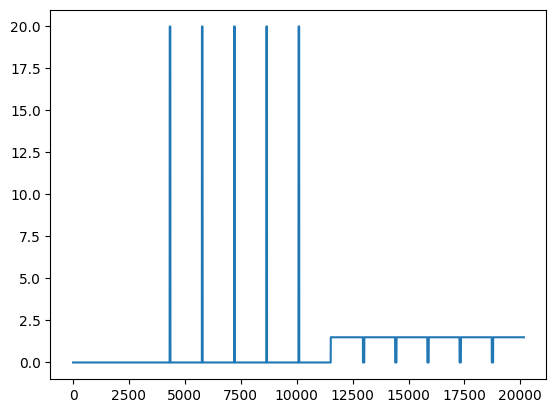

In [ ]:
plt.plot(input1,input2)
plt.plot(input1,input3)
plt.plot(input1,input4)

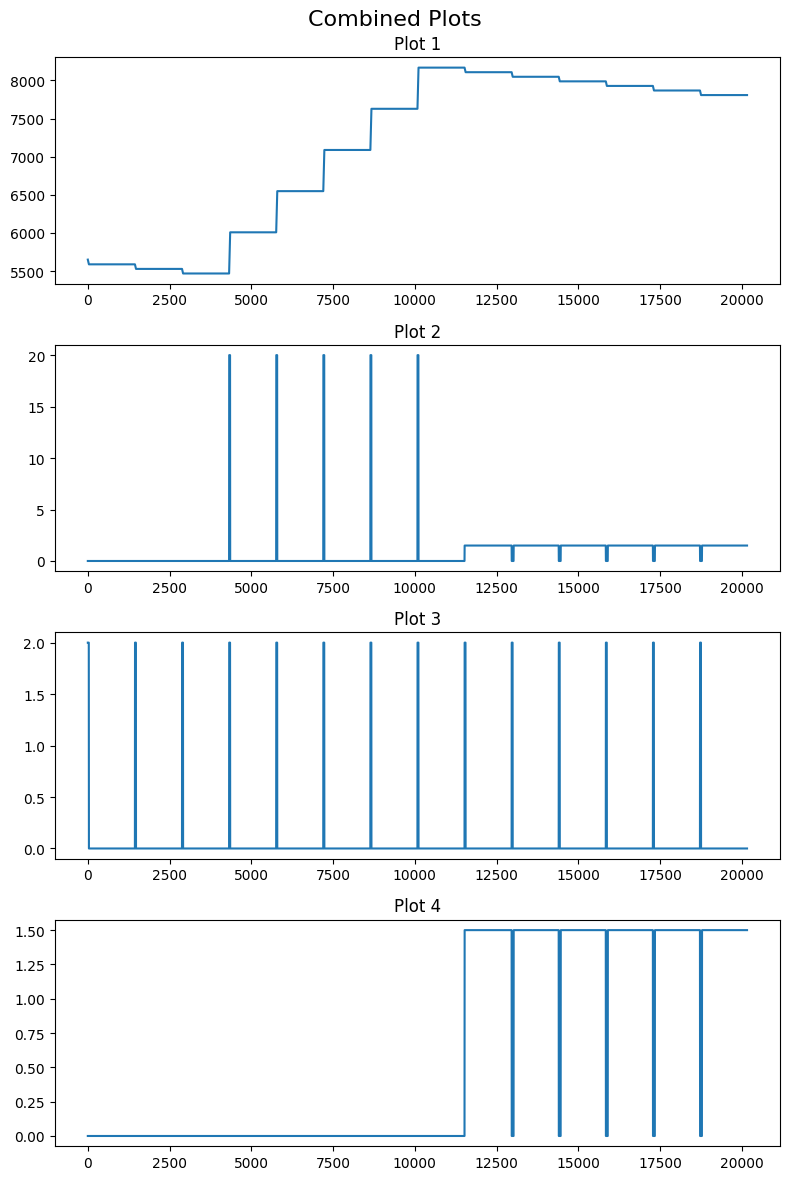

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have data for input1, input2, input3, and input4
# Make sure these arrays have the same length

# Create a 4x1 subplot grid
fig, axs = plt.subplots(4, 1, figsize=(8, 12))  # You can adjust the figsize as needed

# Plot each dataset in its corresponding subplot
axs[0].plot(input1, input5)
axs[0].set_title('Plot 1')  # Add a title if needed

axs[1].plot(input1, input2)
axs[1].set_title('Plot 2')

axs[2].plot(input1, input3)
axs[2].set_title('Plot 3')

axs[3].plot(input1, input4)
axs[3].set_title('Plot 4')

# Add overall title and adjust layout
plt.suptitle('Combined Plots', fontsize=16)
plt.tight_layout()
# Save the combined subplot as a JPEG file
plt.savefig('combined_plots.jpg', dpi=1000)  # Change 'combined_plots.jpg' to your desired file name

# Show the combined subplot
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

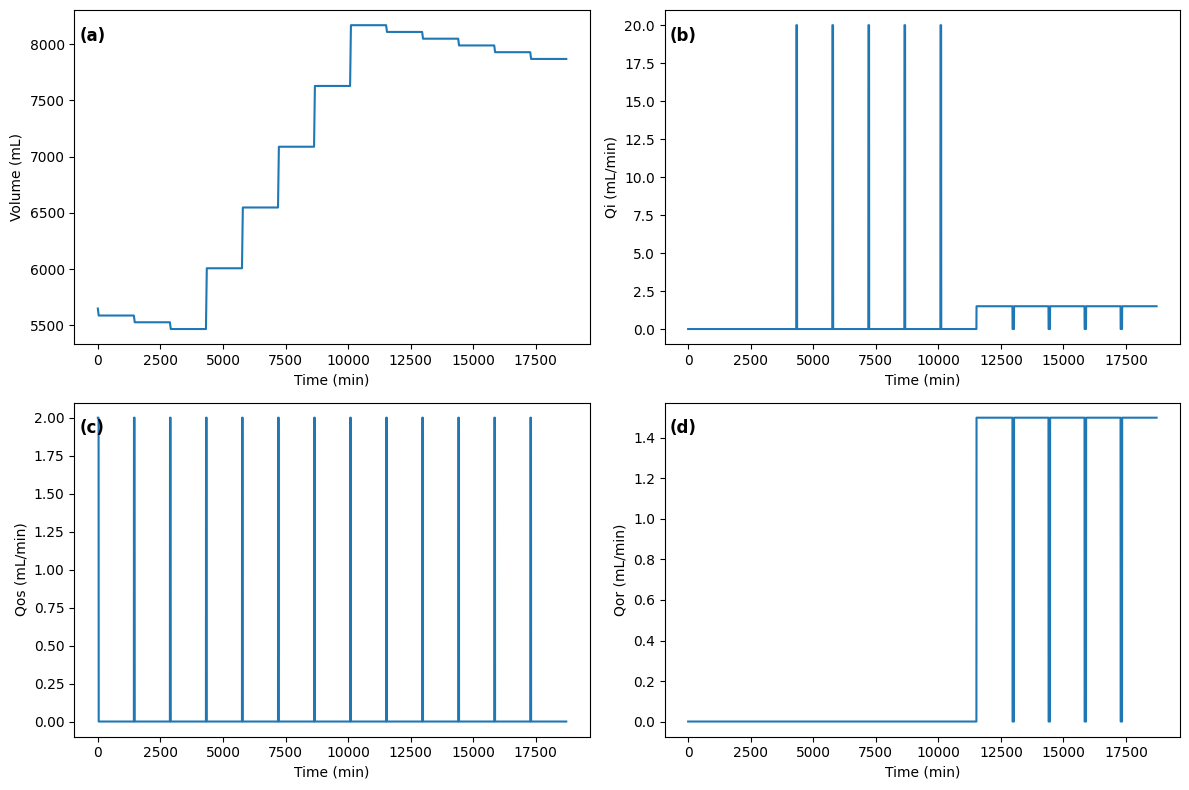

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have data for input1, input2, input3, and input4
# Make sure these arrays have the same length

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # You can adjust the figsize as needed

# Plot each dataset in its corresponding subplot
axs[0, 0].plot(input1, input5)
axs[0, 0].set_xlabel('Time (min)')  # Add X-axis label
axs[0, 0].set_ylabel('Volume (mL)')  # Add Y-axis label
axs[0, 0].text(0.01, 0.95, '(a)', transform=axs[0, 0].transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='left', color='black', weight='bold')

axs[0, 1].plot(input1, input2)
axs[0, 1].set_xlabel('Time (min)')  # Add X-axis label
axs[0, 1].set_ylabel('Qi (mL/min)')  # Add Y-axis label
axs[0, 1].text(0.01, 0.95, '(b)', transform=axs[0, 1].transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='left', color='black', weight='bold')

axs[1, 0].plot(input1, input3)
axs[1, 0].set_xlabel('Time (min)')  # Add X-axis label
axs[1, 0].set_ylabel('Qos (mL/min)')  # Add Y-axis label
axs[1, 0].text(0.01, 0.95, '(c)', transform=axs[1, 0].transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='left', color='black', weight='bold')

axs[1, 1].plot(input1, input4)
axs[1, 1].set_xlabel('Time (min)')  # Add X-axis label
axs[1, 1].set_ylabel('Qor (mL/min)')  # Add Y-axis label
axs[1, 1].text(0.01, 0.95, '(d)', transform=axs[1, 1].transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='left', color='black', weight='bold')

plt.tight_layout()

# Save the combined subplot as a JPEG file
plt.savefig('input_13.jpg', dpi=800)  # Change 'input_data_15.jpg' to your desired file name
files.download('input_13.jpg')
# Show the combined subplot
plt.show()


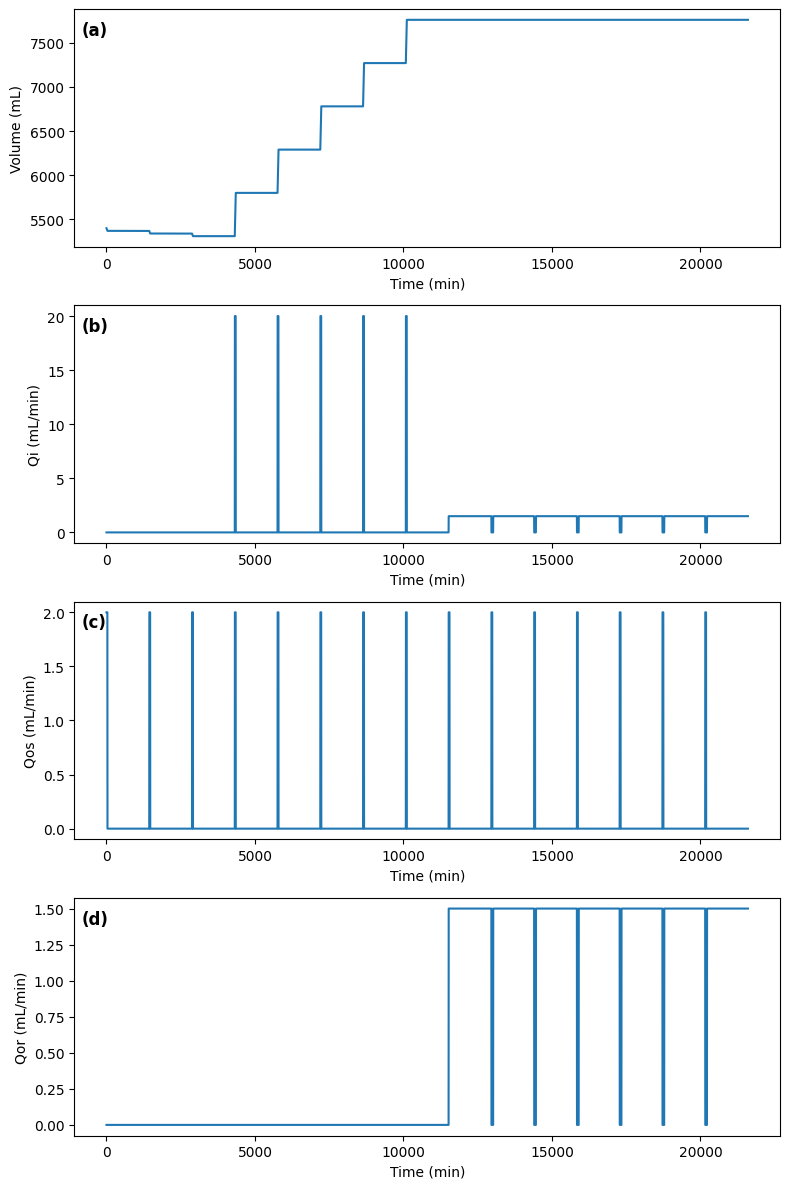

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have data for input1, input2, input3, and input4
# Make sure these arrays have the same length

# Create a 4x1 subplot grid
fig, axs = plt.subplots(4, 1, figsize=(8, 12))  # You can adjust the figsize as needed

# Plot each dataset in its corresponding subplot
axs[0].plot(input1, input5)
axs[0].set_xlabel('Time (min)')  # Add X-axis label
axs[0].set_ylabel('Volume (mL)')  # Add Y-axis label
axs[0].text(0.01, 0.95, '(a)', transform=axs[0].transAxes, fontsize=12,
           verticalalignment='top', horizontalalignment='left', color='black', weight='bold')

axs[1].plot(input1, input2)
axs[1].set_xlabel('Time (min)')  # Add X-axis label
axs[1].set_ylabel('Qi (mL/min)')  # Add Y-axis label
axs[1].text(0.01, 0.95, '(b)', transform=axs[1].transAxes, fontsize=12,
           verticalalignment='top', horizontalalignment='left', color='black', weight='bold')

axs[2].plot(input1, input3)
axs[2].set_xlabel('Time (min)')  # Add X-axis label
axs[2].set_ylabel('Qos (mL/min)')  # Add Y-axis label
axs[2].text(0.01, 0.95, '(c)', transform=axs[2].transAxes, fontsize=12,
           verticalalignment='top', horizontalalignment='left', color='black', weight='bold')

axs[3].plot(input1, input4)
axs[3].set_xlabel('Time (min)')  # Add X-axis label
axs[3].set_ylabel('Qor (mL/min)')  # Add Y-axis label
axs[3].text(0.01, 0.95, '(d)', transform=axs[3].transAxes, fontsize=12,
           verticalalignment='top', horizontalalignment='left', color='black', weight='bold')


plt.tight_layout()

# Save the combined subplot as a JPEG file
plt.savefig('input_data_15.jpg', dpi=1000)  # Change 'combined_plots.jpg' to your desired file name

# Show the combined subplot
plt.show()
files.download('input_data_15.jpg')

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import grad

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 100)
        self.fc4 = nn.Linear(100, 100)
        self.fc5 = nn.Linear(100, 5)
    def forward(self, x):
        # print(x.dtype)
        # x = torch.relu(self.fc1(x))
        x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.fc5(x)
        return x

In [ ]:
# Define the loss function
def pinn_loss(net, x):
    x.requires_grad = True
    y = net(x)
    Xv_true1, Xd_true1, Glc_true1, Lac_true1, mAb_true1 = dat()
    Xv_true=torch.tensor(Xv_true1)
    Xd_true=torch.tensor(Xd_true1)
    Glc_true=torch.tensor(Glc_true1)
    Lac_true=torch.tensor(Lac_true1)
    mAb_true=torch.tensor(mAb_true1)
    t, Qi, Qos, Qor, V, Xv_ic, Xd_ic, Glc_ic, Lac_ic, mAb_ic = x[:,0], x[:,1] ,x[:,2] ,x[:,3],x[:,4],x[:,5],x[:,6],x[:,7],x[:,8],x[:,9]
    y1,y2,y3,y4,y5= y[:,0],y[:,1],y[:,2],y[:,3],y[:,4]

    Xv = y1
    Xd = y2
    Glc = y3
    Lac = y4
    mAb = y5
    dy1_dx = torch.autograd.grad(y1, x, grad_outputs=torch.ones_like(y1),create_graph=True)[0]
    dy2_dx = torch.autograd.grad(y2, x, grad_outputs=torch.ones_like(y2),create_graph=True)[0]
    dy3_dx = torch.autograd.grad(y3, x, grad_outputs=torch.ones_like(y3),create_graph=True)[0]
    dy4_dx = torch.autograd.grad(y4, x, grad_outputs=torch.ones_like(y4),create_graph=True)[0]
    dy5_dx = torch.autograd.grad(y5, x, grad_outputs=torch.ones_like(y5),create_graph=True)[0]
    # print(dy1_dx[:,0]-eqn1(Qi,Qos,Qor,V,Xv,Xd,Glc,Lac,mAb))
    # print(torch.abs(y1[0] - 0.7))
    pde1=torch.mean(torch.pow((dy1_dx[:,0]-eqn1(Qi,Qos,Qor,V,Xv,Xd,Glc,Lac,mAb)),2))
    pde2=torch.mean(torch.pow((dy2_dx[:,0]-eqn2(Qi,Qos,Qor,V,Xv,Xd,Glc,Lac,mAb)),2))
    pde3=torch.mean(torch.pow((dy3_dx[:,0]-eqn3(Qi,Qos,Qor,V,Xv,Xd,Glc,Lac,mAb)),2))
    pde4=torch.mean(torch.pow((dy4_dx[:,0]-eqn4(Qi,Qos,Qor,V,Xv,Xd,Glc,Lac,mAb)),2))
    pde5=torch.mean(torch.pow((dy5_dx[:,0]-eqn5(Qi,Qos,Qor,V,Xv,Xd,Glc,Lac,mAb)),2))
    residual= pde1+pde2+pde3+pde4+pde5
    ic1=torch.abs(y1[0] - Xv_ic[0])
    ic2=torch.abs(y2[0] - Xd_ic[0])
    ic3=torch.abs(y3[0] - Glc_ic[0])
    ic4=torch.abs(y4[0] - Lac_ic[0])
    ic5=torch.abs(y5[0] - mAb_ic[0])
    ic_loss= ic1+ic2+ic3+ic4+ic5
    # l2_loss =torch.mean(residual**2)
    # dataloss=torch.mean(torch.pow((Xv-Xv_true),2))+torch.mean(torch.pow((Xd-Xd_true),2))+torch.mean(torch.pow((Glc-Glc_true),2))+torch.mean(torch.pow((Lac-Lac_true),2))+torch.mean(torch.pow((mAb-mAb_true),2))
    dl1=torch.mean(torch.abs(Xv-Xv_true))
    dl2=torch.mean(torch.abs(Xd-Xd_true))
    dl3=torch.mean(torch.abs(Glc-Glc_true))
    dl4=torch.mean(torch.abs(Lac-Lac_true))
    dl5=torch.mean(torch.abs(mAb-mAb_true))
    dataloss=dl1+dl2+dl3+dl4+dl5
    l2_loss = residual+dataloss+ic_loss
    pi_l=[pde1,pde2,pde3,pde4,pde5,ic1,ic2,ic3,ic4,ic5,dl1,dl2,dl3,dl4,dl5,residual,ic_loss,dataloss,l2_loss]
    return pi_l

In [ ]:
# Train the network
net = Net()

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
x = torch.tensor(final_x)
# y = torch.zeros_like(x)
epochs = []
losses = []
pde_l=[]
ic_l=[]
dl_l=[]
for epoch in range(1000):
    optimizer.zero_grad()
    ll=pinn_loss(net, x)
    loss = ll[18]
    loss.backward()
    optimizer.step()
    epochs.append(epoch)
    losses.append(loss.item())
    pde_l.append(ll[15].item())
    ic_l.append(ll[16].item())
    dl_l.append(ll[17].item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, loss {loss.item()} , pde_Xv {ll[0]}, pde_Xd {ll[1]}, pde_Glc {ll[2]}, pde_Lac {ll[3]}, pde_mAb {ll[4]}, ic_Xv {ll[5]}, ic_Xd {ll[6]}, ic_Glc {ll[7]}, ic_Lac {ll[8]}, ic_mAb {ll[9]}, dl_Xv {ll[10]}, dl_Xd {ll[11]}, dl_Glc {ll[12]}, dl_Lac {ll[13]}, dl_mAb {ll[14]}, pde_total {ll[15]}, ic_total {ll[16]}, dl_total {ll[17]}")


Epoch 0, loss 20.43569283642634 , pde_Xv 2.951160809061548e-07, pde_Xd 7.87227065757179e-08, pde_Glc 1.3758704881183803e-05, pde_Lac 1.1398056187772454e-07, pde_mAb 0.002611065050587058, ic_Xv 0.35881462693214417, ic_Xd 0.1767864227294922, ic_Glc 5.351406574249268, ic_Lac 0.1608743667602539, ic_mAb 0.07175619900226593, dl_Xv 8.85426917444271, dl_Xd 0.34723208862821714, dl_Glc 2.34897920362125, dl_Lac 1.8818990455152442, dl_mAb 0.881049569733746, pde_total 0.002625311492010951, ic_total 6.119638442993164, dl_total 14.313429081941166
Epoch 10, loss 13.729851953788323 , pde_Xv 1.2956159025634406e-06, pde_Xd 9.412402590669444e-08, pde_Glc 6.9620264184777625e-06, pde_Lac 3.2833222007866425e-07, pde_mAb 0.003923316951841116, ic_Xv 0.5769987106323242, ic_Xd 0.15909157693386078, ic_Glc 2.3754079341888428, ic_Lac 0.020382985472679138, ic_mAb 0.055714577436447144, dl_Xv 6.929225026950058, dl_Xd 0.20155386626885935, dl_Glc 1.7591351784559648, dl_Lac 1.1105570177436612, dl_mAb 0.5378530232227452, 

In [ ]:
import pandas as pd
from google.colab import files

# Sample lists


# Create a DataFrame
df_l = pd.DataFrame({'Epochs': epochs, 'Losses': losses,'pde_l': pde_l,'ic_l':ic_l,'dl_l':dl_l})

# Save DataFrame to Excel file
excel_filename = 'lossvsepochs.xlsx'
df_l.to_excel(excel_filename, index=False)

# Download the Excel file
files.download(excel_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Upload the Excel file to Colab
from google.colab import files
uploaded = files.upload()

# Read the Excel file into a DataFrame
excel_filename = list(uploaded.keys())[0]
df = pd.read_excel(excel_filename)



Saving loss_upload.xlsx to loss_upload.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

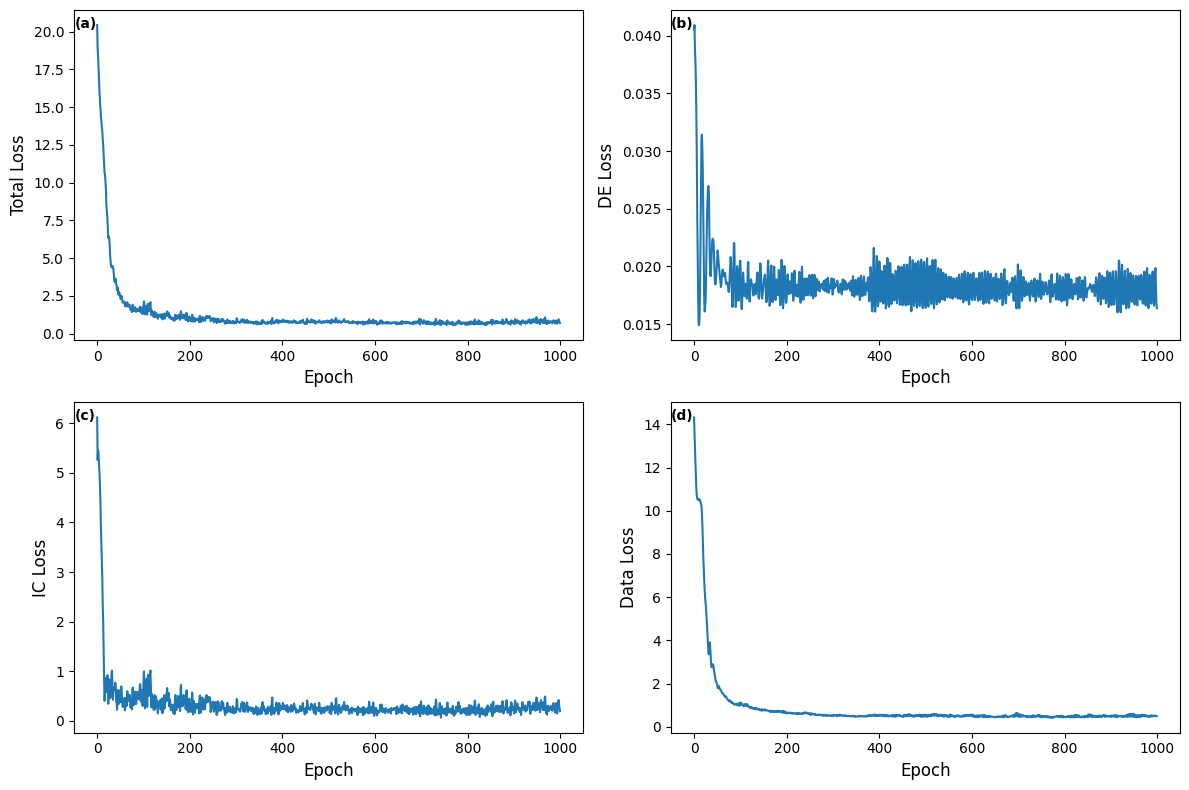

In [ ]:
# Set font properties
font_properties_bold = {'fontname': 'Times New Roman', 'fontsize': 10, 'fontweight': 'bold'}
font_properties_regular = {'fontname': 'Times New Roman', 'fontsize': 12}

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot Losses
axes[0, 0].plot(df['Epochs'], df['Losses'])
axes[0, 0].set_xlabel('Epoch', fontdict=font_properties_regular)
axes[0, 0].set_ylabel('Total Loss', fontdict=font_properties_regular)
axes[0, 0].text(0.0005, 0.98, '(a)', transform=axes[0, 0].transAxes, va='top', ha='left', fontdict=font_properties_bold)

# Plot pde_l
axes[0, 1].plot(df['Epochs'], df['pde_l'])
axes[0, 1].set_xlabel('Epoch', fontdict=font_properties_regular)
axes[0, 1].set_ylabel('DE Loss', fontdict=font_properties_regular)
axes[0, 1].text(0.0005, 0.98, '(b)', transform=axes[0, 1].transAxes, va='top', ha='left', fontdict=font_properties_bold)

# Plot ic_l
axes[1, 0].plot(df['Epochs'], df['ic_l'])
axes[1, 0].set_xlabel('Epoch', fontdict=font_properties_regular)
axes[1, 0].set_ylabel('IC Loss', fontdict=font_properties_regular)
axes[1, 0].text(0.0005, 0.98, '(c)', transform=axes[1, 0].transAxes, va='top', ha='left', fontdict=font_properties_bold)

# Plot dl_l
axes[1, 1].plot(df['Epochs'], df['dl_l'])
axes[1, 1].set_xlabel('Epoch', fontdict=font_properties_regular)
axes[1, 1].set_ylabel('Data Loss', fontdict=font_properties_regular)
axes[1, 1].text(0.0005, 0.98, '(d)', transform=axes[1, 1].transAxes, va='top', ha='left', fontdict=font_properties_bold)

# Adjust layout for better visualization
plt.tight_layout()
# Save the plots with dpi=800
plt.savefig('loss_plots_updated_new.jpg', dpi=800)

# Download the saved plots
files.download('loss_plots_updated_new.jpg')
# Show the plots
plt.show()


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive',force_remount=True)
# save_path = '/content/gdrive/My Drive/model_14_13.pth'
# save_path = '/content/drive/MyDrive/model_14_13_gperL_initial_cond_func_notnormalized.pth'
save_path = '/content/drive/MyDrive/model_14_gperL_initial_cond_func_notnormalized.pth'     #updated wale with correct Xd
# save_path = '/content/drive/MyDrive/model_15_updated_gperL_initial_cond_func_notnormalized.pth'
# purane wale mein no gperl

In [ ]:
# torch.save(net, save_path)

In [ ]:
# import torch

# # Save the entire model
# # torch.save(net, 'model.pth')

# # # Save only the model's state dictionary
# # torch.save(model.state_dict(), 'model_state.pth')
# # Load the model
net1 = torch.load(save_path)


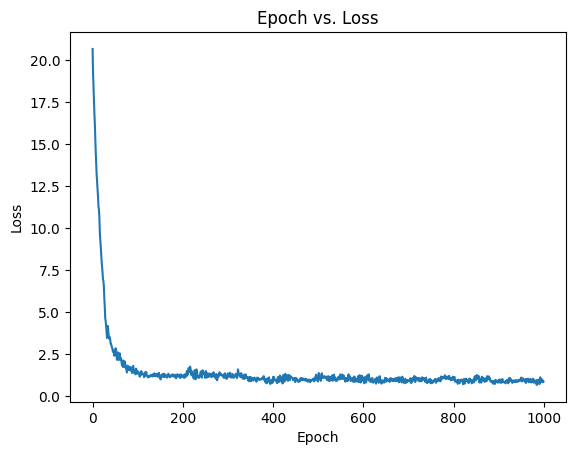

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs, losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss')
plt.show()

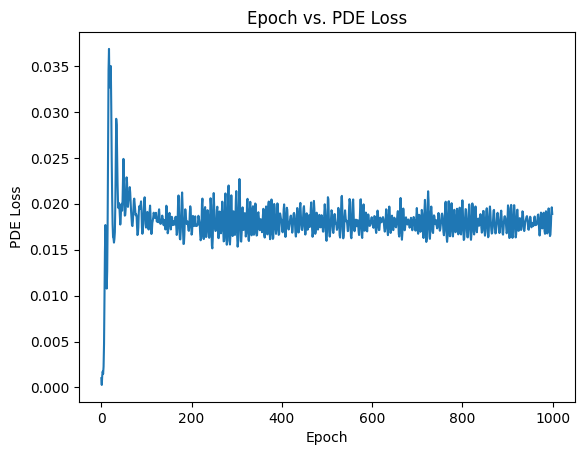

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs, pde_l)
plt.xlabel('Epoch')
plt.ylabel('PDE Loss')
plt.title('Epoch vs. PDE Loss')
plt.show()

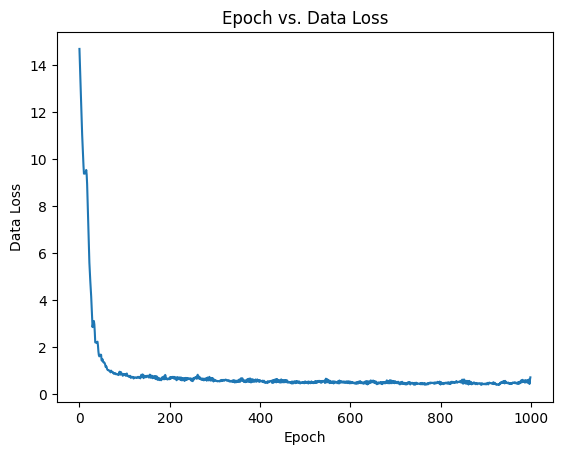

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs, dl_l)
plt.xlabel('Epoch')
plt.ylabel('Data Loss')
plt.title('Epoch vs. Data Loss')
plt.show()

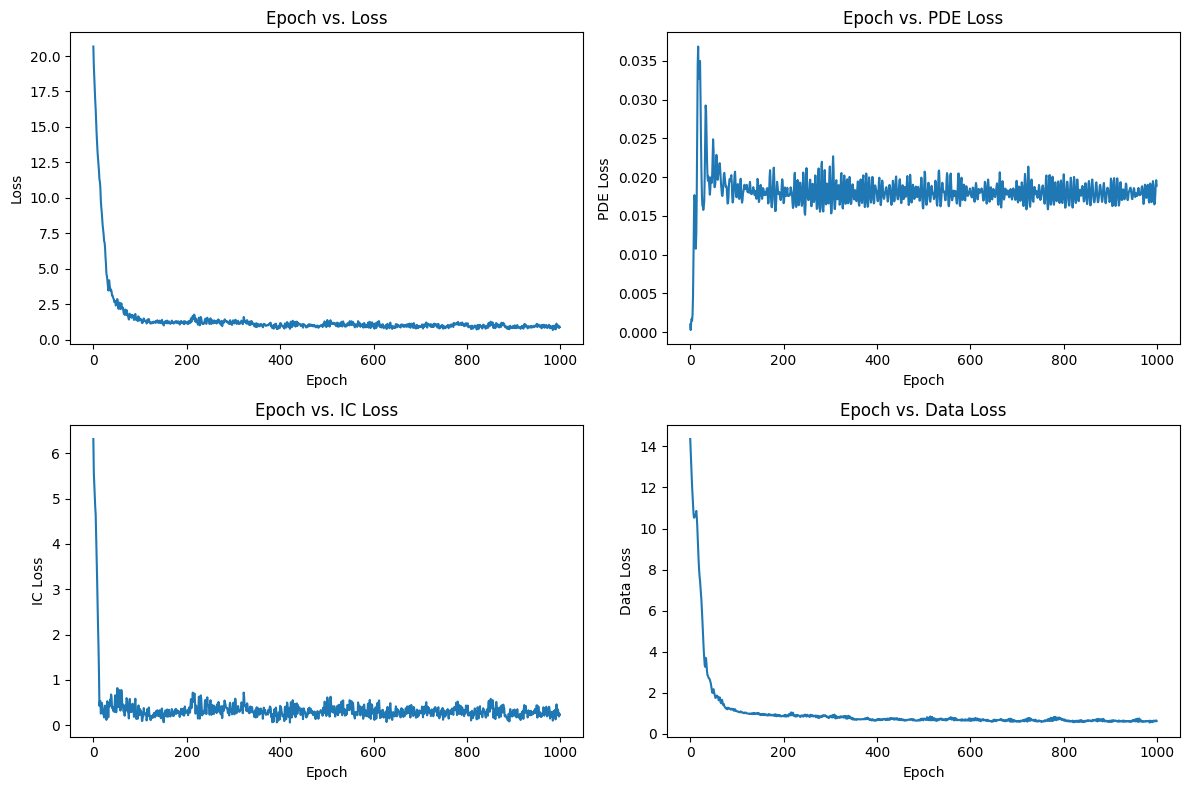

In [ ]:
import matplotlib.pyplot as plt

# Create a 1x3 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Adjust the figsize as needed

# Plot the first subplot
axs[0,0].plot(epochs, losses)
axs[0,0].set_xlabel('Epoch')
axs[0,0].set_ylabel('Loss')
axs[0,0].set_title('Epoch vs. Loss')

# Plot the second subplot
axs[0,1].plot(epochs, pde_l)
axs[0,1].set_xlabel('Epoch')
axs[0,1].set_ylabel('PDE Loss')
axs[0,1].set_title('Epoch vs. PDE Loss')

# Plot the third subplot
axs[1,0].plot(epochs, ic_l)
axs[1,0].set_xlabel('Epoch')
axs[1,0].set_ylabel('IC Loss')
axs[1,0].set_title('Epoch vs. IC Loss')

# Plot the third subplot
axs[1,1].plot(epochs, dl_l)
axs[1,1].set_xlabel('Epoch')
axs[1,1].set_ylabel('Data Loss')
axs[1,1].set_title('Epoch vs. Data Loss')

# Adjust layout
plt.tight_layout()
plt.savefig('14_13_all_losses.jpg', dpi=300)
# Show the combined subplot
plt.show()


In [ ]:
input1test = np.array(torch.linspace(0,18720,18721))
import pandas as pd
file_path = "/content/drive/MyDrive/Spline/dataloss_diff_spline_13days.xlsx"
df1 = pd.read_excel(file_path)
df1

Qi (ml/min)  Qos (ml/min)  Qor (ml/min)  V (ml)         Xv        Xd  \
0              0.0             2           0.0    5650   0.700000  0.007071   
1              0.0             2           0.0    5648   0.700503  0.007084   
2              0.0             2           0.0    5646   0.701005  0.007097   
3              0.0             2           0.0    5644   0.701507  0.007110   
4              0.0             2           0.0    5642   0.702009  0.007123   
...            ...           ...           ...     ...        ...       ...   
18716          1.5             0           1.5    7868  11.302140  0.981376   
18717          1.5             0           1.5    7868  11.301610  0.981684   
18718          1.5             0           1.5    7868  11.301070  0.981992   
18719          1.5             0           1.5    7868  11.300540  0.982300   
18720          1.5             0           1.5    7868  11.300000  0.982609   

            Glc       Lac          mAb  
0      6.053135  0.127403     0.000100  
1      6.053124  0.127357     0.002415  
2      6.053113  0.127311     0.004924  
3      6.053102  0.127265     0.007425  
4      6.053090  0.127220     0.009920  
...         ...       ...          ...  
18716  1.649779  0.579194  2058.442000  
18717  1.649587  0.579536  2058.831000  
18718  1.649395  0.579878  2059.220000  
18719  1.649204  0.580220  2059.610000  
18720  1.649012  0.580564  2060.000000  

[18721 rows x 9 columns]

In [ ]:
# input1test = np.array(torch.linspace(0,21600,21601))
# import pandas as pd
# file_path = "/content/drive/MyDrive/Spline/dataloss_diff_spline_15days.xlsx"
# df1 = pd.read_excel(file_path)
# df1

Qi (ml/min)  Qos (ml/min)  Qor (ml/min)  V (ml)         Xv        Xd  \
0              0.0             2           0.0    5400   0.590000  0.005960   
1              0.0             2           0.0    5399   0.590440  0.005946   
2              0.0             2           0.0    5398   0.590879  0.005932   
3              0.0             2           0.0    5397   0.591318  0.005918   
4              0.0             2           0.0    5396   0.591757  0.005904   
...            ...           ...           ...     ...        ...       ...   
21596          1.5             0           1.5    7760  11.900097  0.924352   
21597          1.5             0           1.5    7760  11.900072  0.924083   
21598          1.5             0           1.5    7760  11.900048  0.923815   
21599          1.5             0           1.5    7760  11.900024  0.923546   
21600          1.5             0           1.5    7760  11.900000  0.923276   

            Glc       Lac          mAb  mAb(g/L)  
0      5.364974 -0.006035     0.000000  0.000000  
1      5.364442 -0.006229    -0.008887 -0.000009  
2      5.363911 -0.006423    -0.017755 -0.000018  
3      5.363381 -0.006616    -0.026604 -0.000027  
4      5.362852 -0.006809    -0.035436 -0.000035  
...         ...       ...          ...       ...  
21596  0.716198  0.276881  2259.905208  2.259905  
21597  0.716385  0.276779  2259.929318  2.259929  
21598  0.716573  0.276678  2259.953153  2.259953  
21599  0.716761  0.276577  2259.976714  2.259977  
21600  0.716950  0.276476  2260.000000  2.260000  

[21601 rows x 10 columns]

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Assuming you have a dataframe called 'df' with the columns you want to normalize

# # Select the columns you want to normalize
# columns_to_normalize = ['Xv', 'Xd', 'Glc','Lac','mAb']

# # Create a StandardScaler object
# # scaler = StandardScaler()
# scaler = MinMaxScaler()

# # Fit the scaler to the selected columns
# scaler.fit(df1[columns_to_normalize])

# # Transform the selected columns using the scaler
# df1[columns_to_normalize] = scaler.transform(df1[columns_to_normalize])
# df1

In [ ]:
Xv_inc1=0.700000          #13days
Xd_inc1=0.007071
Glc_inc1=6.053135
Lac_inc1=0.127403
mAb_inc1=0.000100
Xv_ic2=np.full((18721,),Xv_inc1)
Xd_ic2=np.full((18721,),Xd_inc1)
Glc_ic2=np.full((18721,),Glc_inc1)
Lac_ic2=np.full((18721,),Lac_inc1)
mAb_ic2=np.full((18721,),mAb_inc1)

In [ ]:
# Xv_inc1=0.53       #14days
# Xd_inc1=0.005354
# Glc_inc1=5.366846
# Lac_inc1=0.240476
# mAb_inc1=0.00670
# Xv_ic2=np.full((20161,),Xv_inc1)
# Xd_ic2=np.full((20161,),Xd_inc1)
# Glc_ic2=np.full((20161,),Glc_inc1)
# Lac_ic2=np.full((20161,),Lac_inc1)
# mAb_ic2=np.full((20161,),mAb_inc1)

In [ ]:
# Xv_inc1=0.59          #15days
# Xd_inc1=0.00596
# Glc_inc1=5.364974
# Lac_inc1=0.0063
# mAb_inc1=0.000100
# Xv_ic2=np.full((21601,),Xv_inc1)
# Xd_ic2=np.full((21601,),Xd_inc1)
# Glc_ic2=np.full((21601,),Glc_inc1)
# Lac_ic2=np.full((21601,),Lac_inc1)
# mAb_ic2=np.full((21601,),mAb_inc1)

In [ ]:
input2test=np.array(df1['Qi (ml/min)'])
input3test=np.array(df1['Qos (ml/min)'])
input4test=np.array(df1['Qor (ml/min)'])
input5test=np.array(df1['V (ml)'])
final_x_test = np.vstack((input1test, input2test, input3test, input4test, input5test,Xv_ic2,Xd_ic2,Glc_ic2,Lac_ic2,mAb_ic2)).T
final_x_test
final_x_test = final_x_test.astype('float32')


torch.Size([18721, 5])


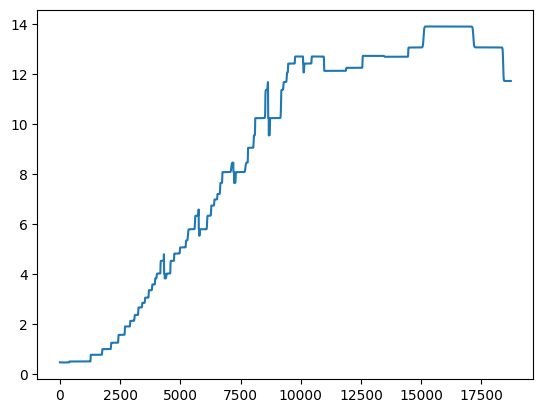

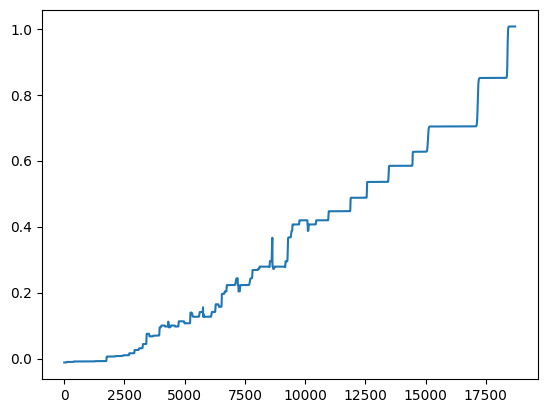

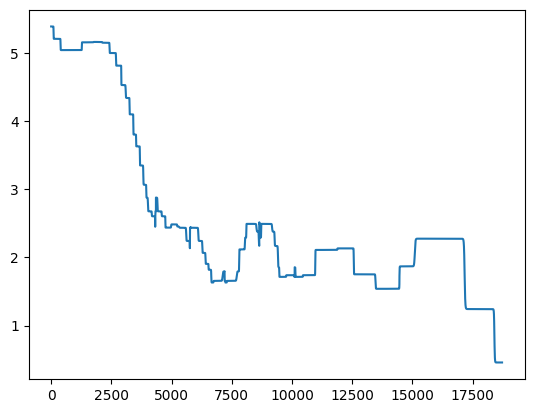

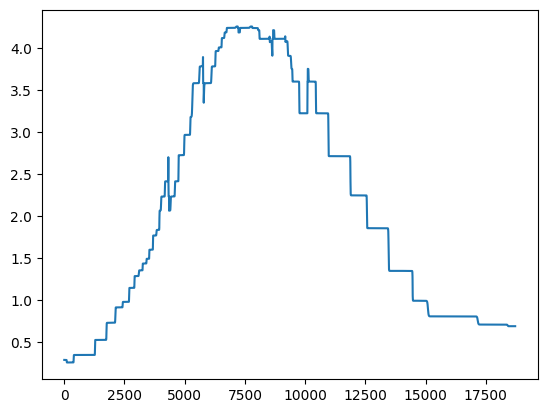

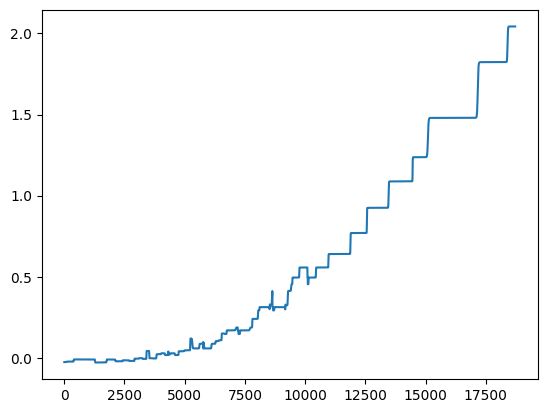

In [ ]:
# Evaluate the trained network
x_test = torch.tensor(final_x_test)
y_test = net1(x_test)
print(y_test.shape)

# Plot the results
import matplotlib.pyplot as plt
for i in range(5):
  plt.figure()
  plt.plot(x_test[:,0].numpy(), y_test.detach().numpy()[:,i:i+1], label = "PINNS Solution")
  # plt.xlabel("x")
  # plt.ylabel("y")
  # plt.show()

  # plt.figure()
  # plt.plot(x_test.numpy(), [(0.5/(0.5+2*i))**0.5 for i in x_test], label = "Analytical Solution")
  # plt.xlabel("x")
  # plt.ylabel("y")
  # plt.legend()
  plt.show()

In [ ]:
import pandas as pd
import numpy as np
x_test = torch.tensor(final_x_test)
y_test = net1(x_test)
Xv1=y_test.detach().numpy()[:,0:1]
Xd1=y_test.detach().numpy()[:,1:2]
Glc1=y_test.detach().numpy()[:,2:3]
Lac1=y_test.detach().numpy()[:,3:4]
mAb1=y_test.detach().numpy()[:,4:5]
Xv11=Xv1.reshape(-1)
Xd11=Xd1.reshape(-1)
Glc11=Glc1.reshape(-1)
Lac11=Lac1.reshape(-1)
mAb11=mAb1.reshape(-1)

# Assuming you have five NumPy arrays: arr1, arr2, arr3, arr4, arr5

# Create a dictionary to store the data
data = {
    'Array 1': Xv11,
    'Array 2': Xd11,
    'Array 3': Glc11,
    'Array 4': Lac11,
    'Array 5': mAb11
}

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Define the file path for saving the Excel sheet on the desktop
file_path = '/content/drive/MyDrive/Colab Notebooks/model_updated_15_13_gperL_initial_cond_func_notnormalized.xlsx'  # Modify the path as per your requirement

# Save the DataFrame to an Excel file
df.to_excel(file_path, index=False)

## **Bayesian optimization**

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.8 MB/s eta 0:00:00


Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0766
Function value obtained: -5.2073
Current minimum: -5.2073
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0036
Function value obtained: -5.2073
Current minimum: -5.2073
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0034
Function value obtained: -4.4666
Current minimum: -5.2073
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0025
Function value obtained: -4.0872
Current minimum: -5.2073
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0033
Function value obtained: -1.9630
Current minimum: -5.2073
Iteration No: 6 started. 

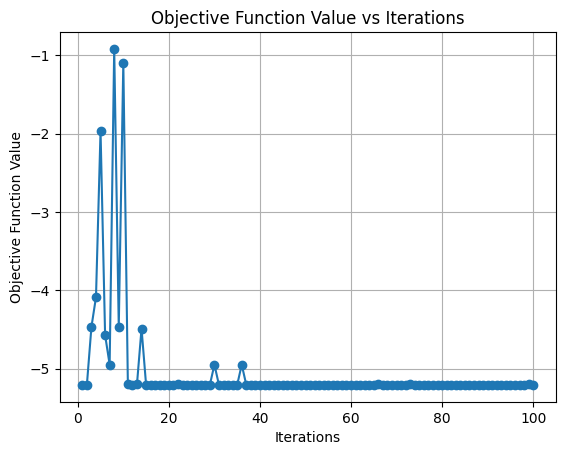

<ipython-input-17-df1fcb982745>:118: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i + 2)  # Adjust subplot arrangement based on your preferences


ValueError: num must be an integer with 1 <= num <= 6, not 7

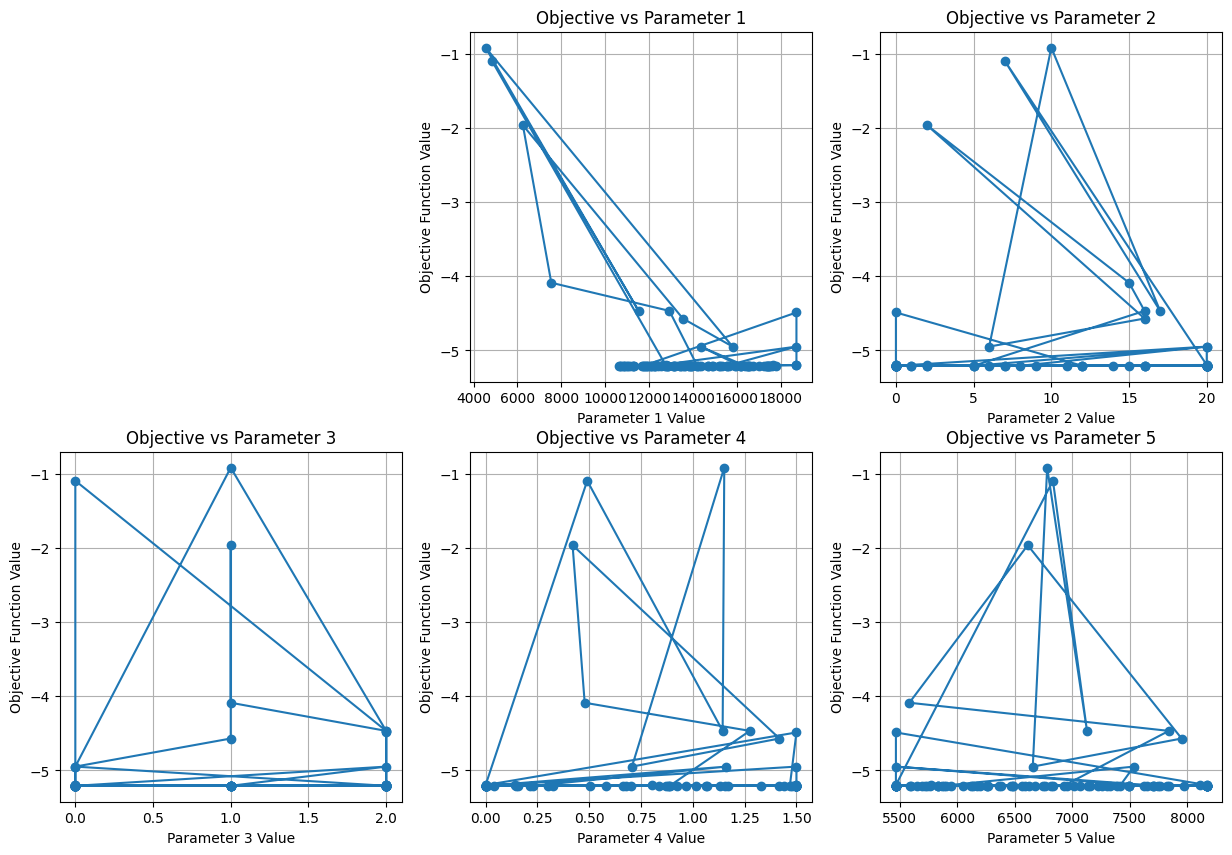

In [ ]:
#main
import numpy as np
import torch
from skopt import gp_minimize
import matplotlib.pyplot as plt
# Define the black-box function for optimization
def black_box_function(X, model):
    # Convert X to a PyTorch tensor
    X_tensor = torch.Tensor(X).view(1, -1)
    # Forward pass through the model
    y = model(X_tensor)
    objective = -0.3*y[0][0]-0.7*y[0][4]
    # objective = -y[0][4]
    return objective.item(), y[0][0].item(), y[0][1].item(), y[0][2].item(), y[0][3].item(), y[0][4].item()
# Instantiate your model
model = net1
X=final_x_test
np.int=int
# Define the hyperparameter bounds
pbounds = [(0, 18720),  # Time    ##############  take note
           (0,20),   # Qi
           (0, 2), # Qos
           (0, 1.5),  #Qor
           (5468, 8168),  #V
           (0.01,0.9999999),   #Xv_ic
           (0.0001,0.09999),   #Xd_ic
           (2,10),   #Glc_ic
           (0.1,0.99),   #Lac_ic
           (0.0001,0.01)]   #mAb_ic
# # Define other constants (w1, w2, w3, w4, w5)
# alpha, beta, gamma, theta, epsilon = 1.0, 1.0, 1.0, 1.0, 1.0
# Perform Bayesian optimization

result = gp_minimize(
    lambda X: black_box_function(X, model)[0],
    dimensions=pbounds,
    n_calls=100,
    verbose=True
)
ti=[]
qii=[]
qosi=[]
qori=[]
vi=[]
obji=[]
for i, (params, objective_value) in enumerate(zip(result.x_iters, result.func_vals)):
    print(f"Iteration {i+1}")
    print("Parameters (X):", params)
    ti.append(params[0])
    qii.append(params[1])
    qosi.append(params[2])
    qori.append(params[3])
    vi.append(params[4])
    obji.append(objective_value)
    print("Objective Function Value (y):", objective_value)
    print()
Y1=[]
Y2=[]
Y3=[]
Y4=[]
Y5=[]

# Print the neural network model outputs for each iteration
for i, (params, objective_value) in enumerate(zip(result.x_iters, result.func_vals)):
    X_current = params  # Get the current parameters
    _, y1, y2, y3, y4, y5 = black_box_function(X_current, model)  # Get model outputs
    Y1.append(y1)
    Y2.append(y2)
    Y3.append(y3)
    Y4.append(y4)
    Y5.append(y5)
    print(f"Iteration {i+1}")
    print("Parameters (X):", X_current)
    print("Objective Function Value (y):", objective_value)
    print("Model Outputs for X[0]:")
    print("y1:", y1)
    print("y2:", y2)
    print("y3:", y3)
    print("y4:", y4)
    print("y5:", y5)
    print()

# Extract the optimal parameters
optimal_params = result.x
print("Optimal Parameters:", optimal_params)
optimal_loss, y1, y2, y3, y4, y5 = black_box_function(optimal_params, model)
print("Objective Function:", optimal_loss)
print("When the objective function is achieved, at optimal point : ")
print("Xv :", y1)
print("Xd :", y2)
print("Glc :", y3)
print("Lac :", y4)
print("mAb :", y5)

# Plot the graph of objective vs iterations
iterations = range(1, len(result.func_vals) + 1)
plt.plot(iterations, (result.func_vals), marker='o')
plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.title("Objective Function Value vs Iterations")
plt.grid(True)
plt.show()

# Plot the graph of objective vs iterations
plt.figure(figsize=(15, 10))

# Plot 1: Objective vs Iterations
plt.subplot(2, 2, 1)
iterations = range(1, len(result.func_vals) + 1)
plt.plot(iterations, result.func_vals, marker='o')
plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.title("Objective Function Value vs Iterations")
plt.grid(True)

# Plot each parameter's effect on the objective function
for i in range(len(pbounds)):
    plt.subplot(2, 3, i + 2)  # Adjust subplot arrangement based on your preferences
    param_values = [res[i] for res in result.x_iters]
    plt.plot(param_values, result.func_vals, marker='o')
    plt.xlabel(f"Parameter {i+1} Value")
    plt.ylabel("Objective Function Value")
    plt.title(f"Objective vs Parameter {i+1}")
    plt.grid(True)

plt.tight_layout()
plt.show()

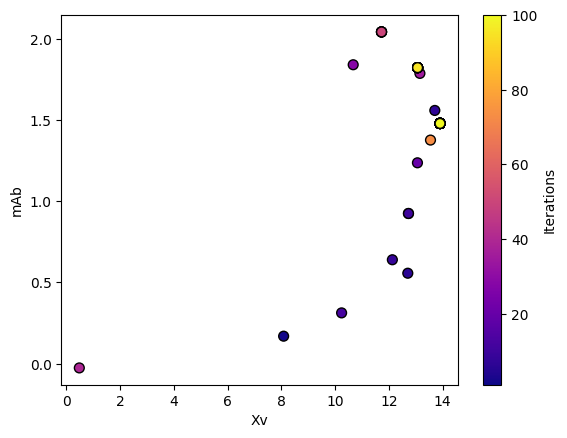

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data

data1 = Y1
data2 = Y5
color_variable = iterations  # This could be another variable determining the color

# Create a scatter plot
# plt.plot(data1, data2, linestyle='--', marker='o', markersize=5, color='orange', label='Lines and Dots')
# plt.scatter(data1, data2, c=color_variable, cmap='viridis', s=50, edgecolors='black', label='Dots')
scatter_plot = plt.scatter(data1, data2,c=color_variable, cmap='plasma', marker='o', s=50, edgecolors='black')

# Add color bar
# colorbar = plt.colorbar()
colorbar = plt.colorbar(scatter_plot)
colorbar.set_label('Iterations')

# Add labels and title
plt.xlabel('Xv')
plt.ylabel('mAb')
# plt.title('2D Scatter Plot with Color Bar')

# Show the plot
plt.show()


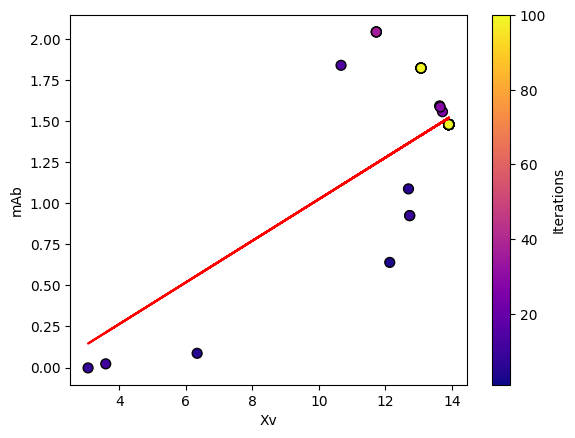

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data

data1 = Y1
data2 = Y5
color_variable = iterations  # This could be another variable determining the color

# Create a scatter plot
# plt.plot(data1, data2, linestyle='--', marker='o', markersize=5, color='orange', label='Lines and Dots')
# plt.scatter(data1, data2, c=color_variable, cmap='viridis', s=50, edgecolors='black', label='Dots')
coefficients = np.polyfit(data1, data2, 1)
poly = np.poly1d(coefficients)
scatter_plot = plt.scatter(data1, data2,c=color_variable, cmap='plasma', marker='o', s=50, edgecolors='black')
# Generate x values for the curve
# x_values = np.linspace(min(data1), max(data1), 100)
# Plot the trendline
# plt.plot(x_values, poly(x_values), color='red', label='Curve Fit')

plt.plot(data1, poly(data1), color='red', label='Trendline')

# Add color bar
# colorbar = plt.colorbar()
colorbar = plt.colorbar(scatter_plot)
colorbar.set_label('Iterations')

# Add labels and title
plt.xlabel('Xv')
plt.ylabel('mAb')
# plt.title('2D Scatter Plot with Color Bar')

# Show the plot
plt.show()


In [ ]:
# import pandas as pd

# # Example data
# list1 = Y1
# list2 = Y5

# # Create a DataFrame using pandas
# df = pd.DataFrame({'Column1': list1, 'Column2': list2})

# # Save the DataFrame to an Excel file
# df.to_excel('output.xlsx', index=False)
# # Download the Excel file
# files.download('output.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ##The excel sheets are uploaded on the drive for the three runs as on 27-12-2023, no need to run the opti code now, just use the followings:


In [ ]:
data = {
    'Time': ti,
    'Qi': qii,
    'Qos': qosi,
    'Qor': qori,
    'Volume': vi,
    'Objective function value': obji,
    # 'Xv_opt': data1,
    # 'mAb_opt': data2
}

# Create a DataFrame from the data dictionary
dfi = pd.DataFrame(data)

# Define the file path for saving the Excel sheet on the desktop
# file_path = '/content/drive/MyDrive/Colab Notebooks/params for objective max Xv.xlsx'  # Modify the path as per your requirement
# file_path = '/content/drive/MyDrive/Colab Notebooks/params for objective max mAb.xlsx'  # Modify the path as per your requirement
file_path = '/content/drive/MyDrive/Colab Notebooks/params for objective max weighted.xlsx'  # Modify the path as per your requirement

# Save the DataFrame to an Excel file
# dfi.to_excel(file_path, index=False)

In [ ]:
# file_path = '/content/drive/MyDrive/Colab Notebooks/params for objective max Xv.xlsx'
# file_path = '/content/drive/MyDrive/Colab Notebooks/params for objective max mAb.xlsx'
file_path = '/content/drive/MyDrive/Colab Notebooks/params for objective max weighted.xlsx'

In [ ]:
import pandas as pd
dfi=pd.read_excel(file_path)

In [ ]:
dfi

Time  Qi  Qos       Qor  Volume  Objective function value
0   12909  13    1  0.986783    5806                 -5.197249
1     842  16    0  0.961112    6365                 -0.146788
2     147   8    0  0.453577    7967                 -0.125826
3    6674   6    1  0.424408    6052                 -2.851505
4   10508  16    1  0.952811    7079                 -4.214126
..    ...  ..  ...       ...     ...                       ...
95  17605  19    2  0.027181    7826                 -5.197249
96  15657  20    2  1.500000    7852                 -5.207288
97  12257  20    1  1.500000    5953                 -5.207288
98  13572  11    1  1.076333    6764                 -5.207288
99  17823   0    1  0.000000    7040                 -4.948259

[100 rows x 6 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

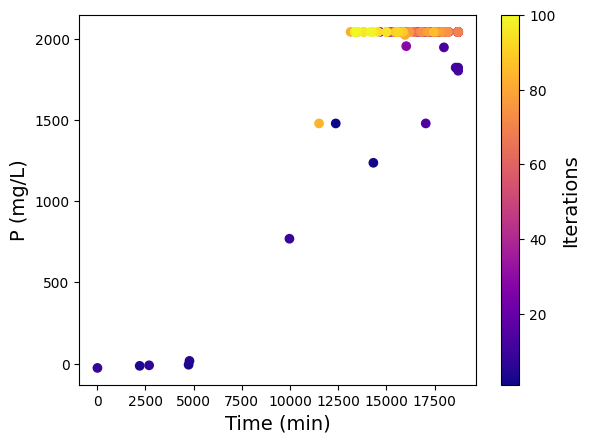

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Sample data
iterations = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])
objective_values = np.array(dfi['Objective function value'])

# Create a colormap for gradient coloring based on 'iterations' values
colormap = plt.get_cmap('plasma')

# Create a scatter plot with color-coded points
scatter = plt.scatter(dfi['Time'], (-1000) * objective_values, c=iterations, cmap=colormap, marker='o')

# Mark the specific point (iteration=60, objective value=9) with a green color
# specific_point_color = 'green'
# plt.scatter([60], [3.474], c=specific_point_color, marker='*', s=30, label='Specific Point')

# Add a color bar with the 'plasma' colormap using the original 'iterations' values
cbar = plt.colorbar(scatter, cmap=colormap)
cbar.set_label('Iterations', fontname='Times New Roman', fontsize=14)

# Labels and title with Times New Roman font
# plt.xlabel('F$_{i}$ (mL/min)' , fontname='Times New Roman', fontsize=14)
plt.xlabel('Time (min)' , fontname='Times New Roman', fontsize=14)
plt.ylabel('P (mg/L)', fontname='Times New Roman', fontsize=14)

# Save the plots with dpi=800
plt.savefig('P2.jpg', dpi=800)

# Download the saved plots
files.download('P2.jpg')

# Show the plots
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

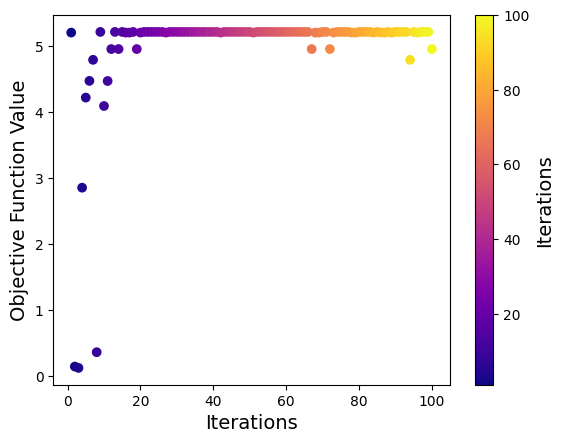

In [ ]:
#main code
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Sample data
iterations = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])
objective_values = np.array(dfi['Objective function value'])

# Create a colormap for gradient coloring based on 'iterations' values
colormap = plt.get_cmap('plasma')

# Create a scatter plot with color-coded points
scatter = plt.scatter(iterations, (-1) * objective_values, c=iterations, cmap=colormap, marker='o')

# Mark the specific point (iteration=60, objective value=9) with a green color
# specific_point_color = 'green'
# plt.scatter([60], [3.474], c=specific_point_color, marker='*', s=30, label='Specific Point')

# Add a color bar with the 'plasma' colormap using the original 'iterations' values
cbar = plt.colorbar(scatter, cmap=colormap)
cbar.set_label('Iterations', fontname='Times New Roman', fontsize=14)

# Labels and title with Times New Roman font
plt.xlabel('Iterations', fontname='Times New Roman', fontsize=14)
plt.ylabel('Objective Function Value', fontname='Times New Roman', fontsize=14)

# Save the plots with dpi=800
plt.savefig('WW1.jpg', dpi=800)

# Download the saved plots
files.download('WW1.jpg')

# Show the plots
plt.show()


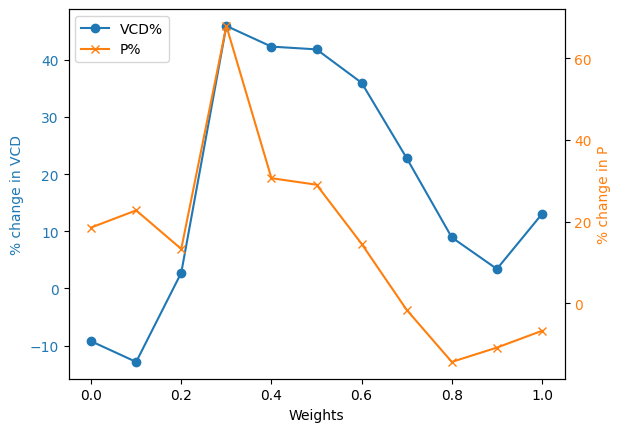

In [ ]:
import matplotlib.pyplot as plt

# Data
Xv = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
Xv_percent = [-9.241916602, -12.86650622, 2.742816625, 45.96476, 42.34127778, 41.85961873, 36.00799427, 22.81046374, 8.929666631, 3.408887868, 13.0345397]
mAb_percent = [18.57970806, 22.77858944, 13.32638583, 67.95829, 30.66169608, 29.0658581, 14.58502328, -1.602690691, -14.33893728, -10.82964377, -6.718996988]

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot Xv% on the left y-axis
ax1.plot(Xv, Xv_percent, color='tab:blue', marker='o', label='VCD%')
ax1.set_xlabel('Weights')
ax1.set_ylabel('% change in VCD', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis on the right
ax2 = ax1.twinx()
ax2.plot(Xv, mAb_percent, color='tab:orange', marker='x', label='P%')
ax2.set_ylabel('% change in P', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Set the title
# plt.title('% change in Xv & mAb vs. weighted Xv')
plt.savefig('weights_analysis.jpg', dpi=800)
# Show the plot
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

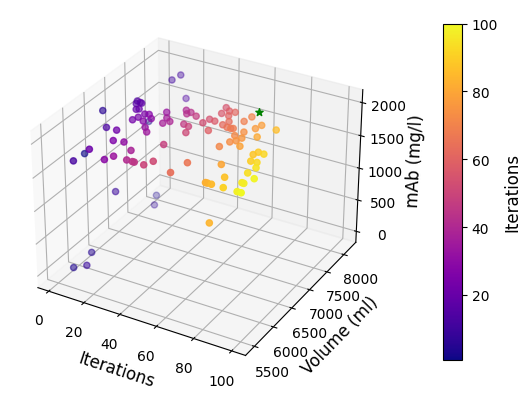

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from google.colab import files

# Sample data
iterations = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])
array1 = np.array(dfi['Volume'])
array2 = np.array(dfi['Objective function value'])
objective_values = array2

# Create a colormap for gradient coloring based on iterations
colormap_iterations = plt.get_cmap('plasma')  # You can choose any other colormap

# Normalize the iterations to the range [0, 1]
# norm_iterations = (iterations - iterations.min()) / (iterations.max() - iterations.min())
norm_iterations = iterations

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with gradient coloring based on iterations
sc = ax.scatter(iterations, array1, (-1000) * array2, c=norm_iterations, cmap=colormap_iterations, marker='o')

# Mark the specific point (iteration=60, objective value=9, Volume=8048) with a green color
specific_point_color = 'green'
ax.scatter([60], [7928], [1723.02], c=specific_point_color, marker='*', s=30, label='Specific Point')

# Add a color bar to show the correspondence between color and iterations
cax = fig.add_axes([0.90, 0.15, 0.03, 0.7])
cbar_iterations = plt.colorbar(sc, cax)
cbar_iterations.set_label('Iterations', fontname='Times New Roman', fontsize=12)

# Labels and title
ax.set_xlabel('Iterations', fontname='Times New Roman', fontsize=12)
# ax.set_ylabel('Time (min)', fontname='Times New Roman', fontsize=12)
ax.set_ylabel('Volume (ml)', fontname='Times New Roman', fontsize=12)
# ax.set_ylabel(r'Q$_{\mathrm{or}}$ (ml/min)', fontname='Times New Roman', fontsize=12)
# ax.set_zlabel(r'X$_{\mathrm{v}}$', fontname='Times New Roman', fontsize=12)
ax.set_zlabel('mAb (mg/l)', fontname='Times New Roman', fontsize=12)
fname='M16g.jpg'
# Save the plots with dpi=800
plt.savefig(fname, dpi=800,bbox_inches='tight')

# Download the saved plots
files.download(fname)
# Show the plots
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

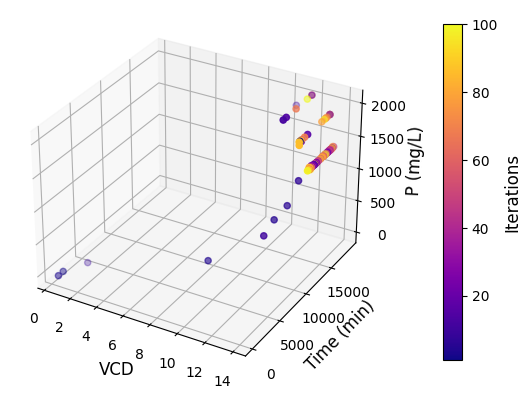

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files

# Sample data
iterations = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])
array1 = np.array(dfi['Time'])
array2 = np.array(Y5)
objective_values = array2

# Create a colormap for gradient coloring based on iterations
colormap_iterations = plt.get_cmap('plasma')  # You can choose any other colormap

# Normalize the iterations to the range [0, 1]
# norm_iterations = (iterations - iterations.min()) / (iterations.max() - iterations.min())
norm_iterations = iterations

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with gradient coloring based on iterations
sc = ax.scatter(np.array(Y1), array1, (1000) * array2, c=norm_iterations, cmap=colormap_iterations, marker='o')


# Add a color bar to show the correspondence between color and iterations
cax = fig.add_axes([0.90, 0.15, 0.03, 0.7])
cbar_iterations = plt.colorbar(sc, cax)
# , label='Iterations', fontname='Times New Roman', fontsize=12)
cbar_iterations.set_label('Iterations', fontname='Times New Roman', fontsize=12)
# Labels and title
ax.set_xlabel('VCD', fontname='Times New Roman', fontsize=12)
ax.set_ylabel('Time (min)', fontname='Times New Roman', fontsize=12)
# ax.set_ylabel('Volume (mL)', fontname='Times New Roman', fontsize=12)
# ax.set_ylabel(r'F$_{\mathrm{o,r}}$ (mL/min)', fontname='Times New Roman', fontsize=12)
ax.set_zlabel('P (mg/L)', fontname='Times New Roman', fontsize=12)
# ax.set_title('Objective Function : Maximize 0.3Xv + 0.7mAb')
fname='WW2.jpg'
# Save the plots with dpi=800
plt.savefig(fname, dpi=800, bbox_inches='tight')

# Download the saved plots
files.download(fname)
# Show the plots
plt.show()
